In [ ]:
import os
# # Current directory is defined
directory = os.getcwd() + "/data/"
# os.chdir(directory)
from model_analysis import *
from plotting_functions import *
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from matplotlib.legend_handler import HandlerTuple

# Directories for plotting are defined
dir_data = directory
dir_plot = directory + "figures/"

# ratio = 0.1 #for figures
ratio = 1.5 # for plotting in notebook
figure_len, figure_width = 13 * ratio, 15.7 * ratio
font_size_1, font_size_2 = 80 * ratio, 65 * ratio
font_size_label = 80 * ratio
legend_size = 50 * ratio
line_width, tick_len = 9 * ratio, 20 * ratio
plot_line_width = 9 * ratio
hfont = {'fontname': 'Arial'}
sns.set(style='ticks')

line_style_rb = (0, (0.05, 2.5))
line_style_r_at = (0, (5, 5))
line_style_r_an = (0, (3,5,1, 5))

color_list = ['#3276b3', '#91bce0', # rE1 and WEE11, rE2 and WEE22
              '#C10000', '#EFABAB', # rP1 and WEP11, rP2 and WEP22
              '#007100', '#87CB87', # rS1 and WES11, rS2 and WES22
              '#6600cc'] # timepoints in long simulation

# Load Data
type of simulation for the entire notebook

In [ ]:
K=0.25
flags = (1, 1, 1, 1, 1, 1)
id_p, title = determine_name(flags)
if K==0.25:
    dir_plot_analytical = 'plot_analytical/' + id_p + '/'
else:
    dir_plot_analytical = 'plot_analytical/K_' + str(K).replace('.','') + '/'

os.makedirs(dir_plot_analytical, exist_ok=True)

In [ ]:
from model_analysis import *
from plotting_functions import *

dir_data = "data/"
dir_plot = dir_data + "figures/"

name_data = 'Case' + id_p + '_test_every_h' + '_k' + str(K).replace(".","")
with open(dir_data + name_data + '.pkl', 'rb') as file:
    l_results = pickle.load(file)
print('Data is read.')

[r_phase1, l_time_points_phase2, r_phase2, l_delta_rE1, av_threshold, delta_t, sampling_rate_sim,l_res_weights] = l_results

Data is read.


# Fitting rates after conditioning with exponential

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

Fitted parameters for SubNetwork 1: a=0.40747590917120297, b=0.16154794608170925, c=1.0519654622290986
Fitted parameters for SubNetwork 2: a=0.23398155529796255, b=0.12924596624225165, c=1.0159859349779794
R^2 for SubNetwork 1: 0.9924
R^2 for SubNetwork 2: 0.9877


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

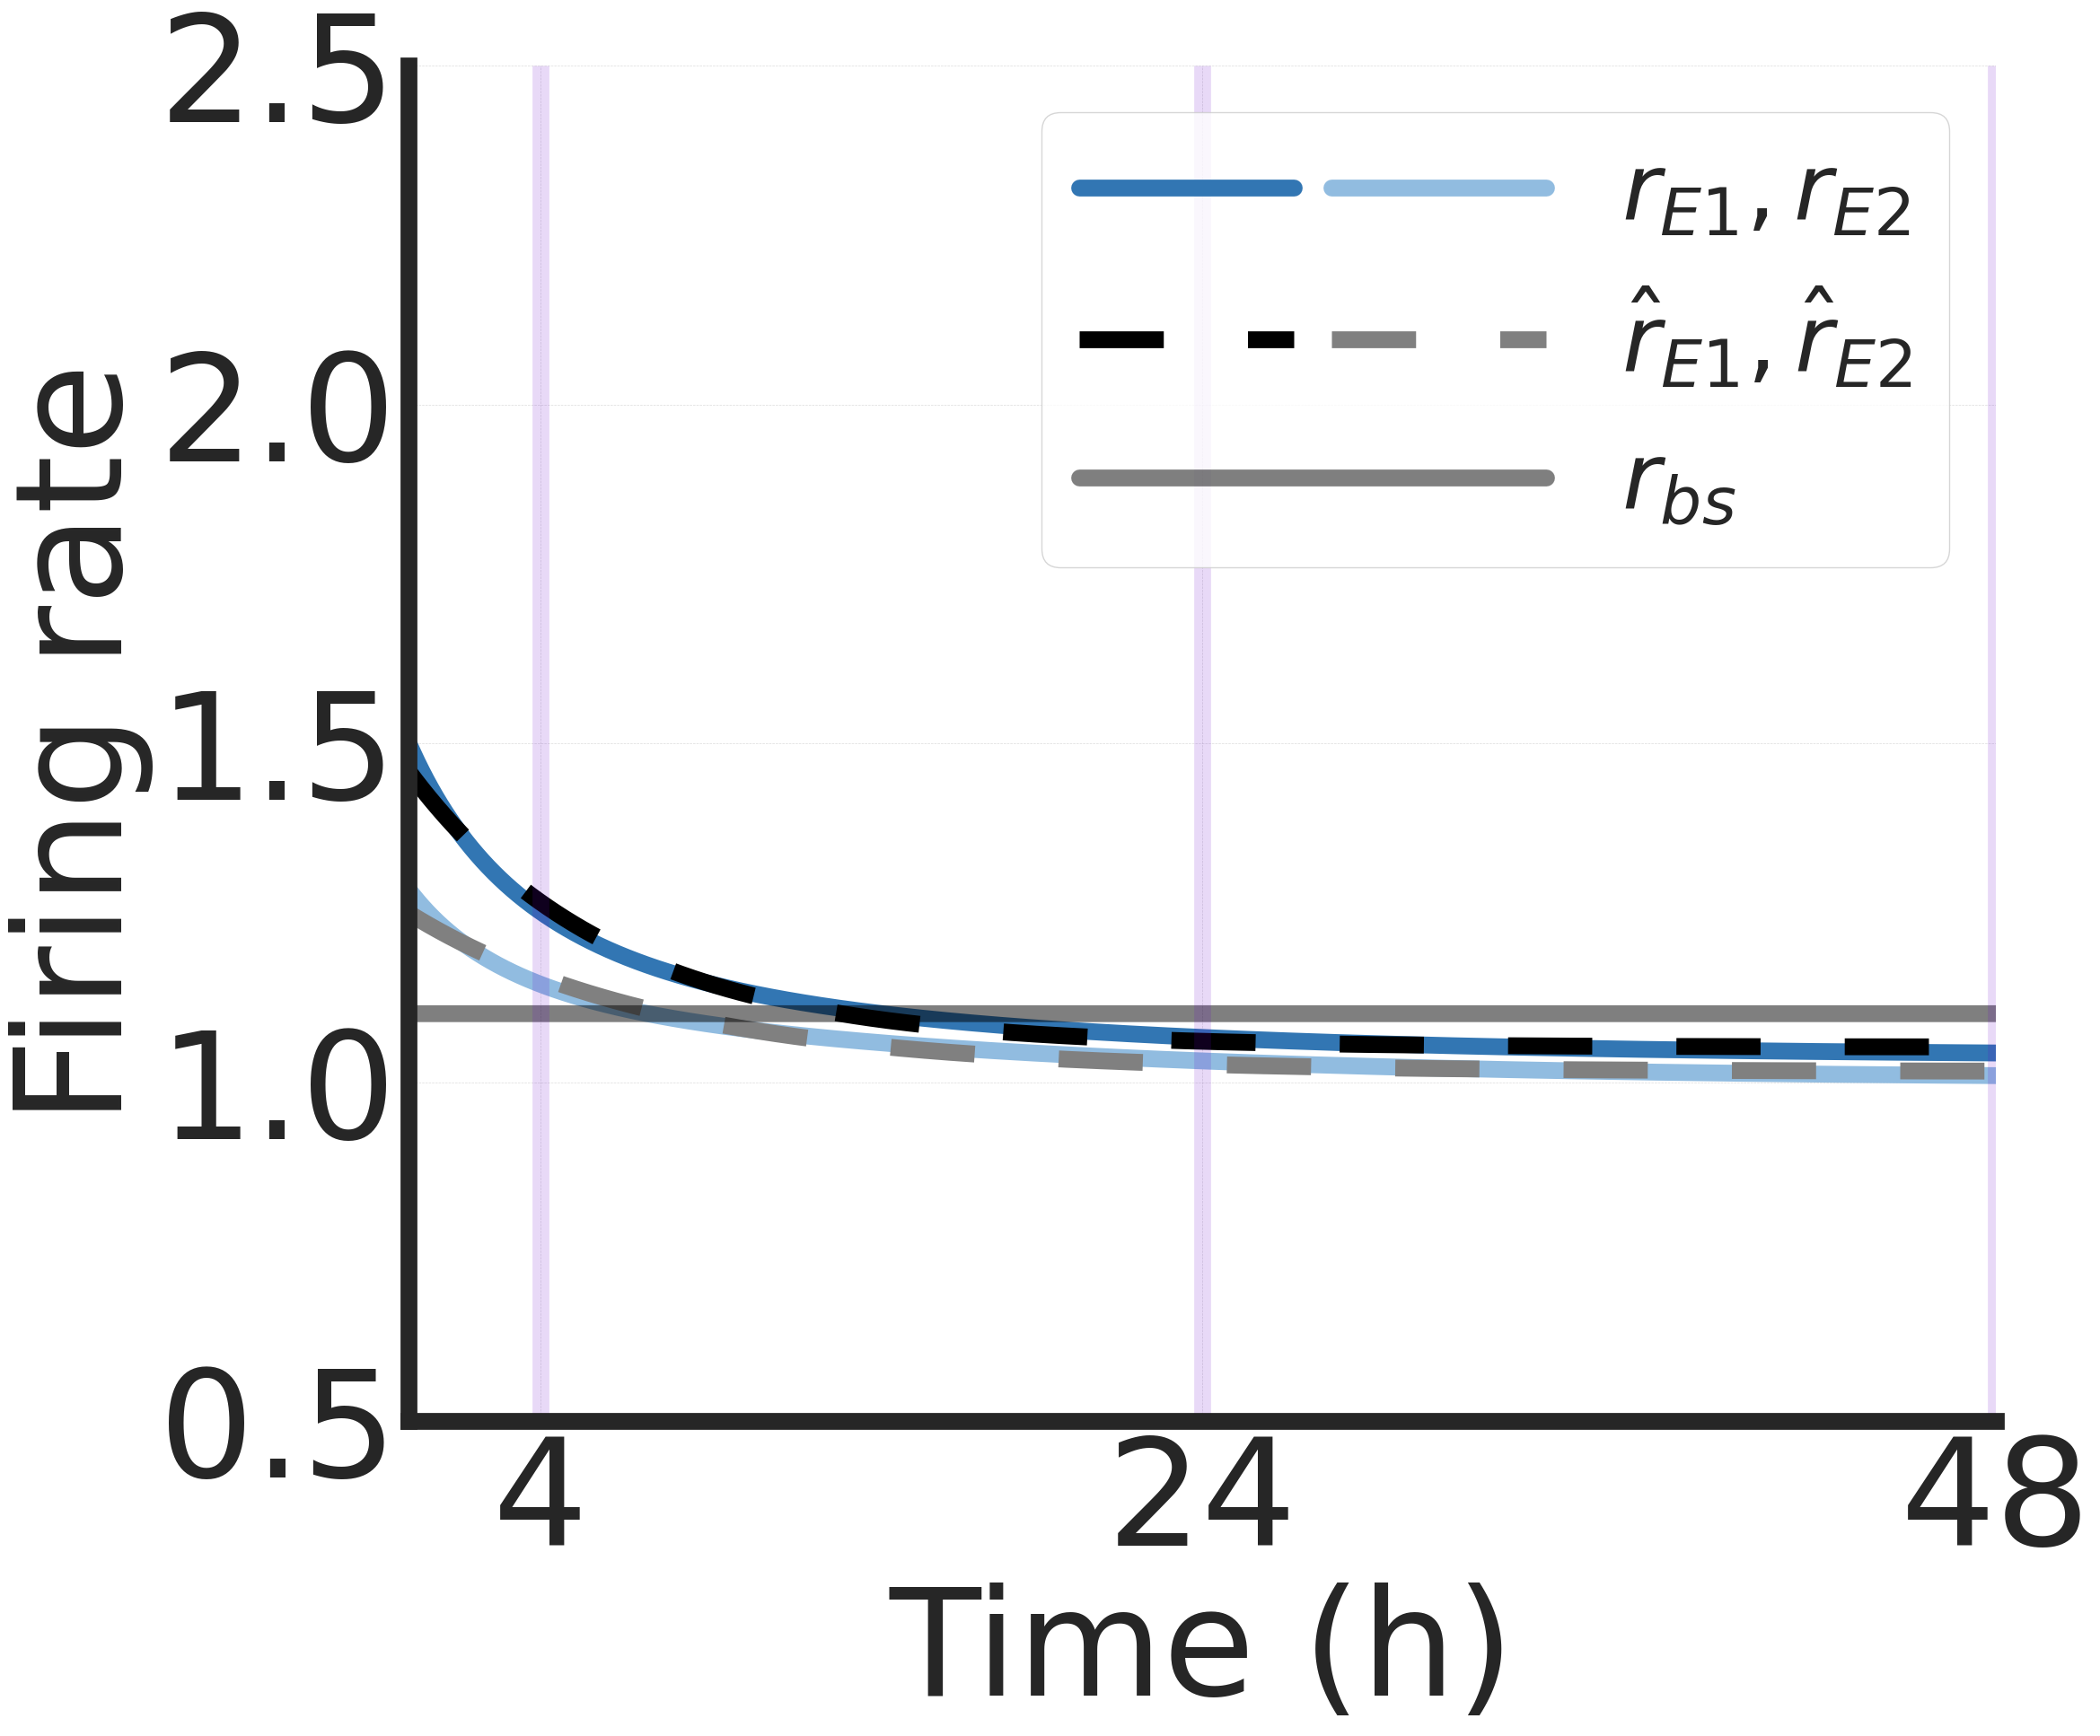

In [ ]:
#for better look
# rE_y_labels = [1, 1.25, 1.5]  # , 3.5] #[0,5,10,15]
# rE_ymin = 0.9
# rE_ymax = 1.75

# for paper
rE_y_labels = [0.5,1, 1.5, 2,2.5]  # , 3.5] #[0,5,10,15]
rE_ymin = 0.5
rE_ymax = 2.5

rE1 = r_phase2[0]; rE2 = r_phase2[1]
rP1 = r_phase2[2]; rP2 = r_phase2[3]
rS1 = r_phase2[4]; rS2 = r_phase2[5]

#Fitting
# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c
# def exponential_func(x, a, b, c, d):
#     return a * np.exp(-b * x - d * x**2) + c

# Your data points (replace with actual data arrays)
skip_first_time_points = 2
x_data = np.array(l_time_points_phase2)[skip_first_time_points:]  # Independent variable (time points)
y1_data = np.array(rE1)[skip_first_time_points:]  # Dependent variable (firing rates)
y2_data = np.array(rE2)[skip_first_time_points:]  # Dependent variable (firing rates)

popt1, pcov1 = curve_fit(exponential_func, x_data, y1_data, maxfev=1200)
popt2, pcov2 = curve_fit(exponential_func, x_data, y2_data)


# Fit the exponential curve (bazooka version)
# min_error = np.inf
# popt1 = [0, 0, 0]
# for m in range(5000):
#     initial_guess = np.random.uniform(0, 100, len(popt1)) # randomly select an initial condition
#     bounds=([0,0,0],[np.inf,np.inf,np.inf])
#     best_opt1, pcov = curve_fit(exponential_func, x_data,y1_data, p0=initial_guess, bounds=bounds,maxfev=60000)
#     error = np.sum(np.abs(exponential_func(x_data, best_opt1[0], best_opt1[1], best_opt1[2])))
#     if error < min_error:
#         min_error = error
#         popt1 = best_opt1
        
# min_error = np.inf
# popt2 = [0, 0, 0]
# for m in range(5000):
#     initial_guess = np.random.uniform(0, 100, len(popt2)) # randomly select an initial condition
#     bounds=([0,0,0],[np.inf,np.inf,np.inf])
#     best_opt2, pcov2 = curve_fit(exponential_func, x_data,y2_data, p0=initial_guess,bounds=bounds, maxfev=60000)
#     error = np.sum(np.abs(exponential_func(x_data, best_opt2[0], best_opt2[1], best_opt2[2])))
#     if error < min_error:
#         min_error = error
#         popt2 = best_opt2

# Extract the parameters
a1, b1, c1 = popt1
a2, b2, c2 = popt2
print(f"Fitted parameters for SubNetwork 1: a={a1}, b={b1}, c={c1}")
print(f"Fitted parameters for SubNetwork 2: a={a2}, b={b2}, c={c2}")

# Generate the fitted curve
y_fit1 = exponential_func(x_data, *popt1)
y_fit2 = exponential_func(x_data, *popt2)

fit_E_after_conditioning = (y_fit1,y_fit2)

### Excitatory rates in the long term ###
xmin = 0
xmax = l_time_points_phase2[-1]
# Define figure size and axis properties
plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)


# Plot downsampled data with smaller markers and transparency
e1, = ax.plot(x_data, y1_data, '-', color=color_list[0],linewidth=plot_line_width, 
#               markersize=plot_line_width, alpha=1,
#               markeredgecolor='black', markeredgewidth=1.5, 
              label=r'Numerics $r_{E1}$')
e2, = ax.plot(x_data, y2_data, '-', color=color_list[1], linewidth=plot_line_width,
#               markersize=plot_line_width, alpha=1,
#               markeredgecolor='black', markeredgewidth=1.5,
              label=r'Numerics $r_{E2}$')

# Plot analytical fits
fite1, = ax.plot(x_data, y_fit1, color='black', linewidth=plot_line_width, linestyle=line_style_r_at, label=r'Analytical Fit $r_{E1}$')
fite2, = ax.plot(x_data, y_fit2, color='grey', linewidth=plot_line_width, linestyle=line_style_r_at, alpha=1, label=r'Analytical Fit $r_{E2}$')

# Plot baseline
rb, = plt.plot(l_time_points_phase2, r_phase1[0][0] * np.ones_like(l_time_points_phase2),
               linestyle='-', color='black',alpha=0.5,
               linewidth=plot_line_width, label='$r_{bs}$')

# Vertical lines for reference points
plt.vlines([4, 24, 48], rE_ymin, rE_ymax, color=color_list[6], linewidth=plot_line_width, alpha=0.15)

# Adjust axes limits and ticks
plt.ylim([rE_ymin, rE_ymax])
plt.xlim([xmin, xmax])
plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
plt.yticks(rE_y_labels, fontsize=font_size_1, **hfont)

# Axis labels
plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
plt.ylabel('Firing rate', fontsize=font_size_label, **hfont)

# Compute R² values
r_squared1 = compute_r_squared(y1_data, y_fit1, label="SubNetwork 1")
r_squared2 = compute_r_squared(y2_data, y_fit2, label="SubNetwork 2")

# Format R² values for the legend
r_squared1_text = f"R² = {r_squared1:.2f}"
r_squared2_text = f"R² = {r_squared2:.2f}"

# Adjust legend to include R² values
ax.legend(
    [(e1, e2), (fite1, fite2), rb],  # Grouped handles
    [
        rf"$r_{{E1}}, r_{{E2}}$",  # Label with R² for numerics
        rf"$\hat{{r}}_{{E1}}, \hat{{r}}_{{E2}}$",  # Label with hat only on r and R² value
        "$r_{bs}$"
    ],  # Labels
    handler_map={tuple: HandlerTuple(ndivide=None)},  # Grouped handler
    fontsize=legend_size,  # Legend font size
    loc="upper right",  # Legend position
    handlelength=5  # Handle length
)

# Add grid for clarity
ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# # Save or show the plot
plt.savefig(dir_plot_analytical + 'fitting_E_rates_after_conditioning' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'fitting_E_rates_after_conditioning' + id_p + '.png', format='png')
plt.show()


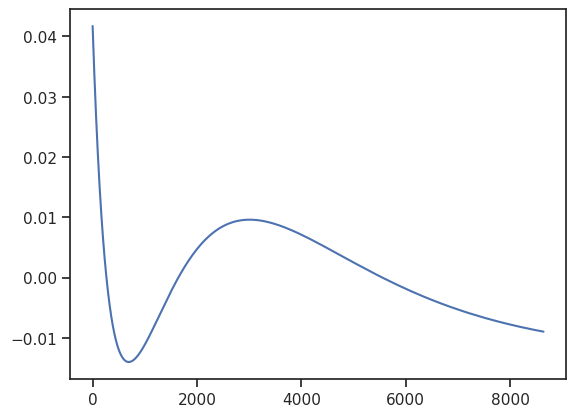

In [18]:
#visualize difference in fitting
plt.plot(y1_data - y_fit1)

### obtained parameters for fitting of exponential AFTER conditioning

In [31]:
# Parameters for Full Model
# a1=0.40747590917120297; 
# b1=0.16154794608170925; 
# c1=1.0519654622290986 # Fitted parameters for SubNetwork 1
# a2=0.23398155529796255 
# b2=0.12924596624225165 
# c2=1.0159859349779794  # Fitted parameters for SubNetwork 2

In [19]:
#other parameters
r_bs = r_phase1[0][0]
tau_b = 28
k = K

# Fitting for beta

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

R^2 for SubNetwork 1: 0.9988
R^2 for SubNetwork 2: 0.9992


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

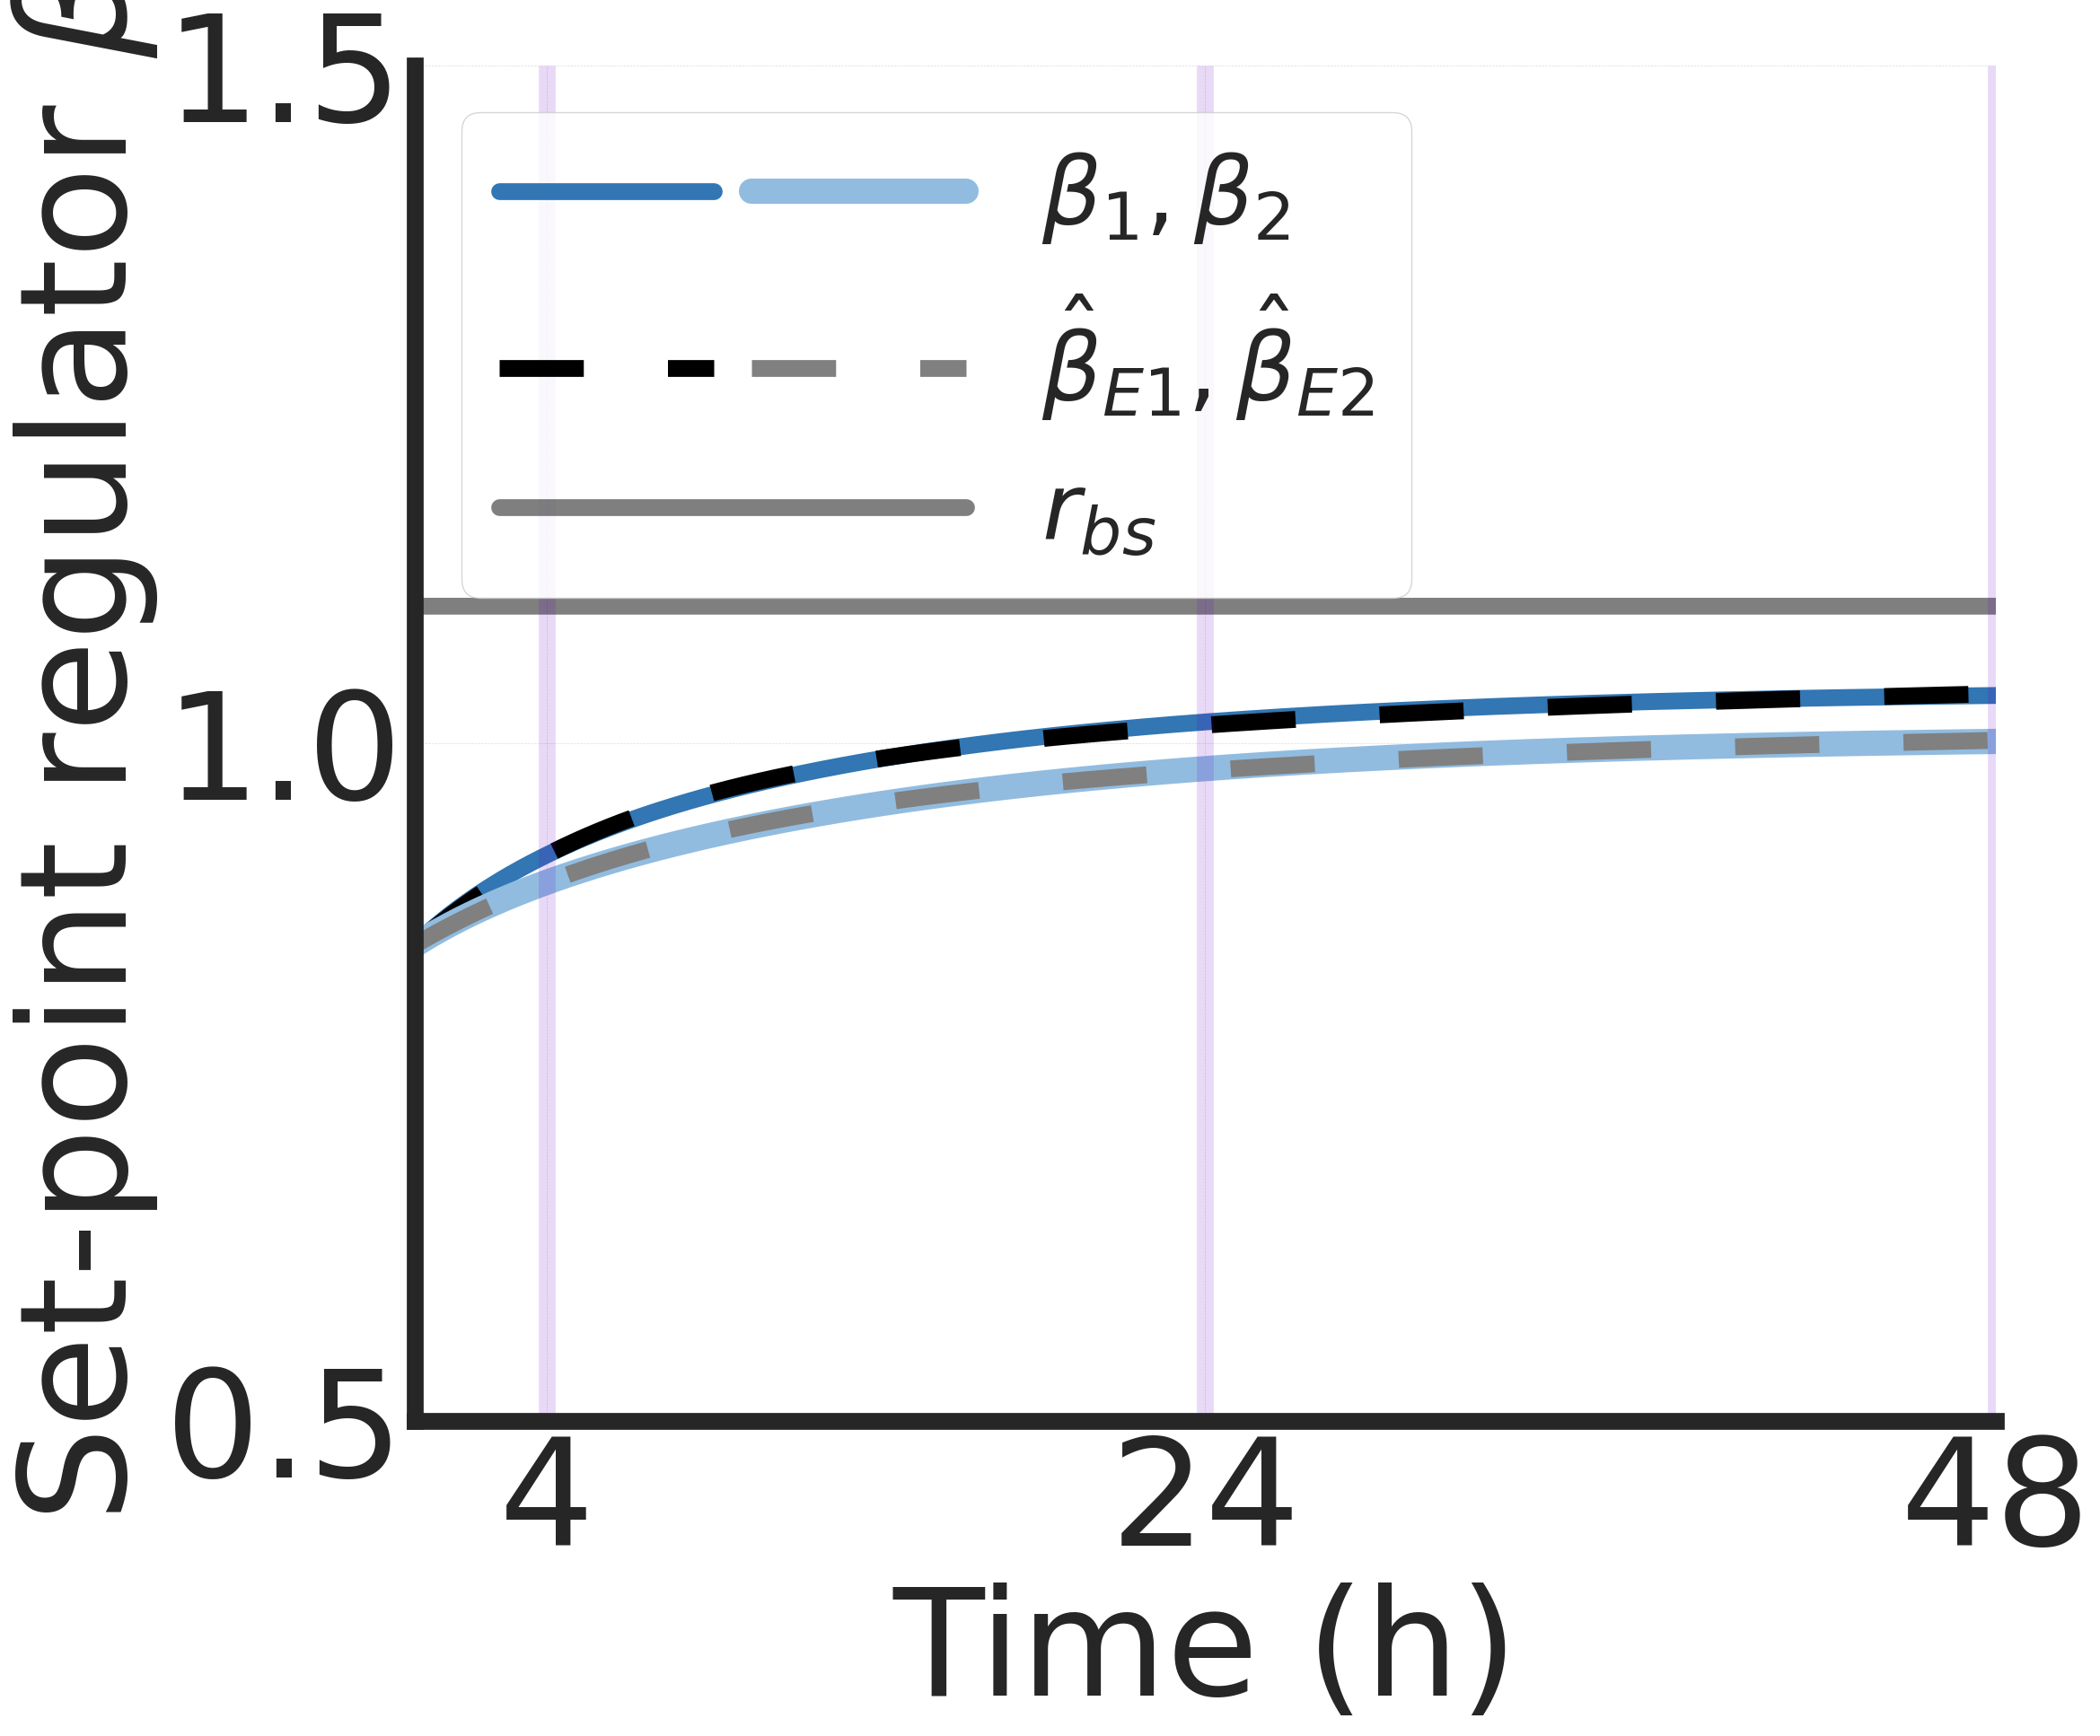

In [20]:
# Define the beta functions
def beta_func(x, a, b, c, r_bs, k, tau_b):
    term1 = a / (1 - b * tau_b)
    return (r_bs - k - term1 - c) * np.exp(-x / tau_b) + term1 * np.exp(-b * x) + c

#for nice plots
# ymin = 0.84
# # # ymax = 1.05
# ymax = 1.15
# y_labels = [0.85,0.95,1.05,1.15]

# #for nice plots
# ymin = 0.5
# # # # ymax = 1.05
# ymax = 1.15
# y_labels = [0.85,0.95,1.05]


#for paper
y_labels = [0.5,1, 1.5]  # , 3.5] #[0,5,10,15]
ymin = 0.5
ymax = 1.5

downsample_rate = 1
# Your data points
x_data = np.array(l_time_points_phase2[skip_first_time_points:])  # Independent variable (time points)
y1_data = np.array(r_phase2[8][skip_first_time_points:])  # Dependent variable for SubNetwork 1
y2_data = np.array(r_phase2[9][skip_first_time_points:])  # Dependent variable for SubNetwork 2

# Compute analytical matches
x_data_analytics = np.linspace(np.min(x_data),np.max(x_data),len(x_data)*downsample_rate)
y1_match = beta_func(x_data_analytics, a1, b1, c1, r_bs, k, tau_b)
y2_match = beta_func(x_data_analytics, a2, b2, c2, r_bs, k, tau_b)

beta_analytics = (y1_match,y2_match)

# Downsample data for analytical points
# x_data_analytics = x_data_analytics[::downsample_rate]
y1_match = y1_match[::downsample_rate]
y2_match = y2_match[::downsample_rate]

r_squared1 = compute_r_squared(y1_data, y1_match, label="SubNetwork 1")
r_squared2 = compute_r_squared(y2_data, y2_match, label="SubNetwork 2")

# Plot both SubNetworks on the same figure
plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)
    


# SubNetwork 1
e1, = plt.plot(
    x_data, y1_data, '-', color=color_list[0], linewidth=plot_line_width, label='Numerics $r_{\\theta_1}$'
)
fite1, = plt.plot(
    x_data, y1_match, linestyle=line_style_r_at, color='black', linewidth=plot_line_width, label='Analytical $r_{\\theta_1}$'
)

# SubNetwork 2
e2, = plt.plot(
    x_data, y2_data, '-', color=color_list[1], linewidth=plot_line_width*1.5, label='Numerics $r_{\\theta_2}$'
)
fite2, = plt.plot(
    x_data, y2_match,linestyle=line_style_r_at, color='grey', linewidth=plot_line_width, label='Analytical $r_{\\theta_2}$'
)

# Plot baseline
rb, = plt.plot(l_time_points_phase2, r_phase1[0][0] * np.ones_like(l_time_points_phase2),
               linestyle='-', color='black',alpha=0.5,
               linewidth=plot_line_width, label='$r_{bs}$')
# Vertical lines for reference points
plt.vlines([4, 24, 48], ymin, ymax, color=color_list[6], linewidth=plot_line_width, alpha=0.15)

# R² labels
r_squared1_text = f"R² = {r_squared1:.3f}"
r_squared2_text = f"R² = {r_squared2:.3f}"

# Add labels, ticks, and grid
plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
plt.ylabel(rf"Set-point regulator $\beta$", fontsize=font_size_label, **hfont)
plt.xticks(fontsize=font_size_1, **hfont)
plt.yticks(fontsize=font_size_1, **hfont)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
plt.yticks(y_labels, fontsize=font_size_1, **hfont)
ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust legend to include R² values
plt.legend(
    [(e1, e2), (fite1, fite2),rb],  # Grouped handles
    [
        rf"$\beta_1, \beta_2$",  # Label with R² for numerics
        rf"$\hat{{\beta}}_{{E1}}, \hat{{\beta}}_{{E2}}$",  # Label with R² for fits
        "$r_{bs}$"
    ],  # Labels
    handler_map={tuple: HandlerTuple(ndivide=None)},  # Grouped handler
    fontsize=legend_size,  # Legend font size
    loc="upper left",  # Legend position
    handlelength=5  # Handle length
)

# Tight layout and display
plt.tight_layout()

plt.savefig(dir_plot_analytical + 'long_beta_match' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'long_beta_match' + id_p + '.png', format='png')
plt.show()


# Fitting for theta

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


R^2 for SubNetwork 1: 0.9943
R^2 for SubNetwork 2: 0.9981


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

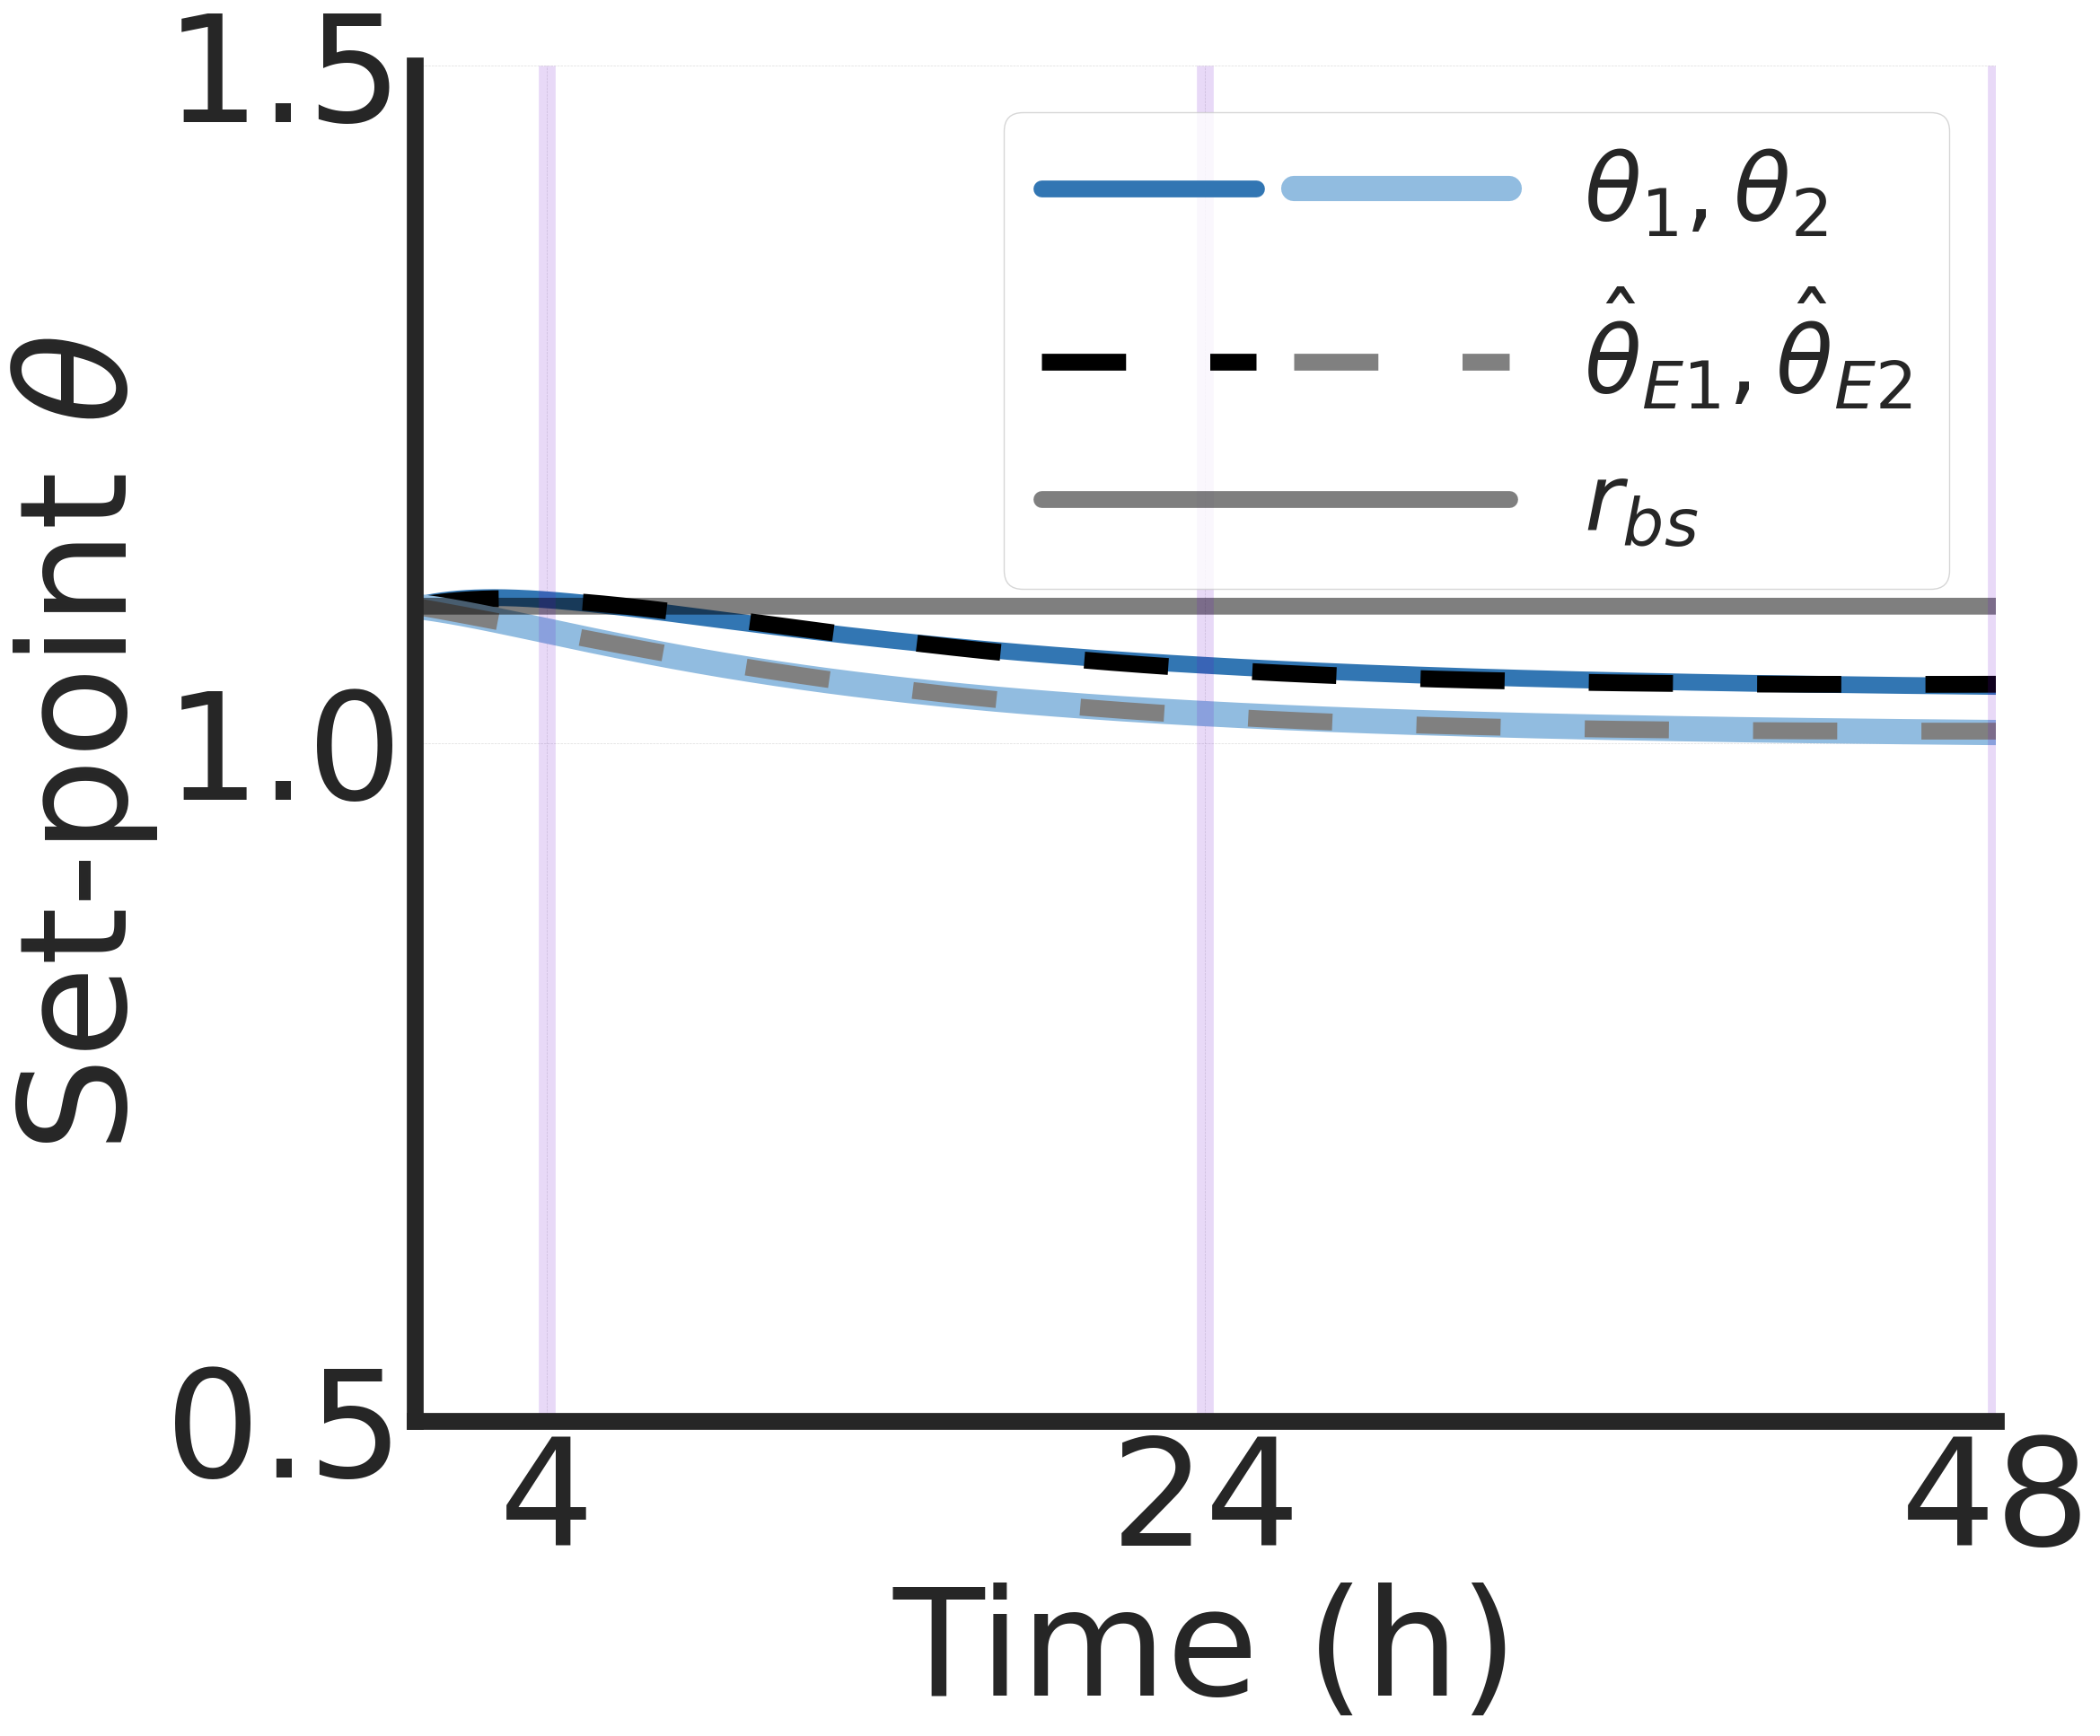

In [21]:
tau_t = 24

def theta_func(x, a, b, c, r_bs, k, tau_b, tau_t):
    term1 = a / (1 - b * tau_b)
    term2 = (a + term1) / (2 - tau_t * b)
    term3 = (r_bs - k - term1 - c) / (2 - tau_t / tau_b)
    return (
        (r_bs - term2 - term3 - c) * np.exp(-2 * x / tau_t)
        + term2 * np.exp(-b * x)
        + term3 * np.exp(-x / tau_b)
        + c
    )

# #for nice plots
# ymin = 1
# ymax = 1.125
# y_labels = [1,1.05,1.1]

# ymin = 0.8
# ymax = 1.125
# y_labels = [1,1.05,1.1]

#for paper
y_labels = [0.5,1, 1.5]  # , 3.5] #[0,5,10,15]
ymin = 0.5
ymax = 1.5
# Your data points
x_data = np.array(l_time_points_phase2[skip_first_time_points:])  # Independent variable (time points)
y1_data = np.array(r_phase2[6][skip_first_time_points:])  # Dependent variable for SubNetwork 1
y2_data = np.array(r_phase2[7][skip_first_time_points:])  # Dependent variable for SubNetwork 2

# Compute analytical matches
# Compute analytical matches
x_data_analytics = np.linspace(np.min(x_data),np.max(x_data),len(x_data)*downsample_rate)
y1_match = theta_func(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t)
y2_match = theta_func(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t)

y1_match = y1_match[::downsample_rate]
y2_match = y2_match[::downsample_rate]

theta_analytics = (y1_match,y2_match)

r_squared1 = compute_r_squared(y1_data, y1_match, label="SubNetwork 1")
r_squared2 = compute_r_squared(y2_data, y2_match, label="SubNetwork 2")

# Plot both SubNetworks on the same figure
plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)


# SubNetwork 1
e1, = plt.plot(
    x_data, y1_data, '-', color=color_list[0], linewidth=plot_line_width, label='Numerics $r_{\\theta_1}$'
)
fite1, = plt.plot(
    x_data, y1_match, linestyle=line_style_r_at, color='black', linewidth=plot_line_width, label='Analytical $r_{\\theta_1}$'
)

# SubNetwork 2
e2, = plt.plot(
    x_data, y2_data, '-', color=color_list[1], linewidth=plot_line_width*1.5, label='Numerics $r_{\\theta_2}$'
)
fite2, = plt.plot(
    x_data, y2_match,linestyle=line_style_r_at, color='grey', linewidth=plot_line_width, label='Analytical $r_{\\theta_2}$'
)

# Plot baseline
rb, = plt.plot(l_time_points_phase2, r_phase1[0][0] * np.ones_like(l_time_points_phase2),
               linestyle='-', color='black',alpha=0.5,
               linewidth=plot_line_width, label='$r_{bs}$')
# Vertical lines for reference points
plt.vlines([4, 24, 48], ymin, ymax, color=color_list[6], linewidth=plot_line_width, alpha=0.15)

# R² labels
r_squared1_text = f"R² = {r_squared1:.3f}"
r_squared2_text = f"R² = {r_squared2:.3f}"

# Add labels, ticks, and grid
plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
plt.ylabel(rf"Set-point $\theta$", fontsize=font_size_label, **hfont)
plt.xticks(fontsize=font_size_1, **hfont)
plt.yticks(fontsize=font_size_1, **hfont)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
plt.yticks(y_labels, fontsize=font_size_1, **hfont)
ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust legend to include R² values
plt.legend(
    [(e1, e2), (fite1, fite2),rb],  # Grouped handles
    [
        rf"$\theta_1, \theta_2$",  # Label with R² for numerics
        rf"$\hat{{\theta}}_{{E1}}, \hat{{\theta}}_{{E2}}$",  # Label with R² for fits
        "$r_{bs}$"
    ],  # Labels
    handler_map={tuple: HandlerTuple(ndivide=None)},  # Grouped handler
    fontsize=legend_size,  # Legend font size
    loc="upper right",  # Legend position
    handlelength=5  # Handle length
)

# Tight layout and display
plt.tight_layout()
plt.savefig(dir_plot_analytical + 'long_theta_match' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'long_theta_match' + id_p + '.png', format='png')
plt.show()


# Fitting exponential DURING conditioning

In [ ]:
from model_analysis import *
from plotting_functions import *

hour_sim=48
name_data = 'Case' + id_p + '_' + str(hour_sim) + 'h' + '_k' + str(K).replace(".","")
with open(dir_data + name_data + '.pkl', 'rb') as file:
    l_results = pickle.load(file)
print('Data is read.')

[l_time_points_stim, l_time_points_phase2, delta_t, sampling_rate, l_res_rates, l_res_weights, av_threshold, stim_times, stim_duration, sim_duration] = l_results
r_phase1 = l_res_rates[0]

Data is read.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

Fitted parameters for SubNetwork 1: a=0.21878270630103985, b=0.08547448773570407, c=1.637829345046532
Fitted parameters for SubNetwork 2: a=0.0663779561235756, b=0.10623895744077277, c=1.1055745347377692


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

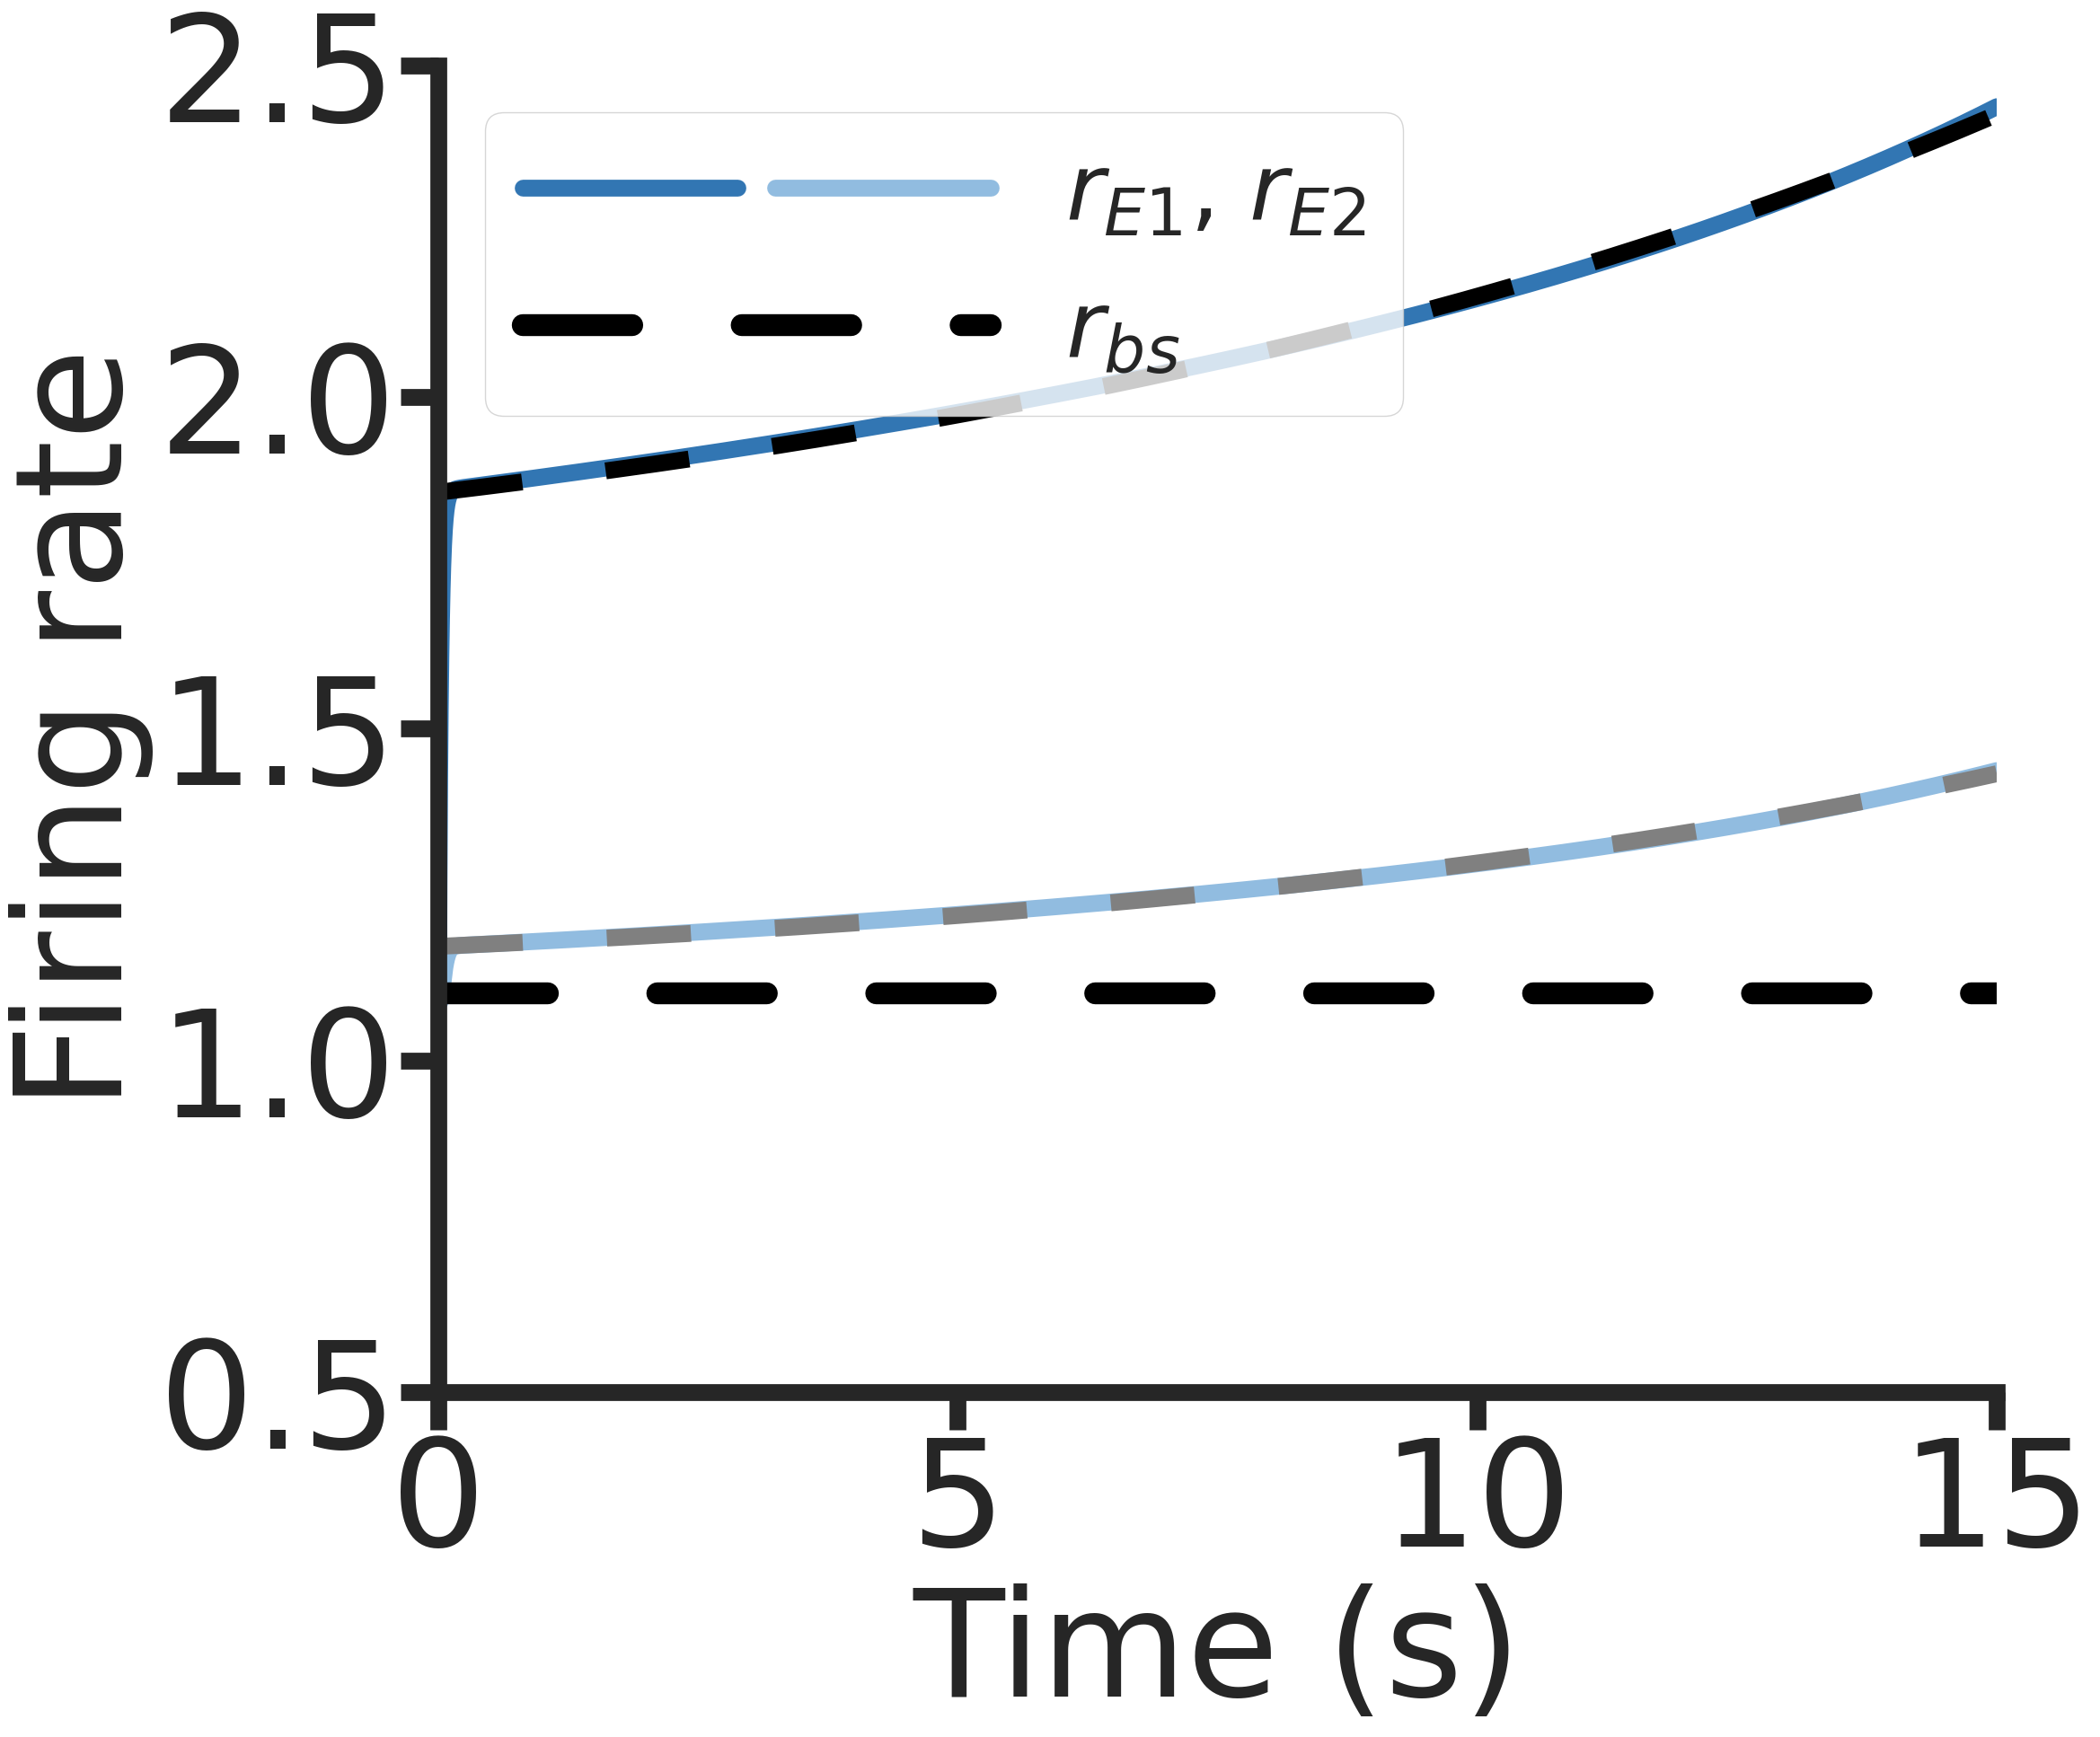

In [24]:
rE1 = r_phase1[0]; rE2 = r_phase1[1]
rE1 = rE1[2499:10000]; rE2 = rE2[2499:10000] #this cutting of the range is equivalent to remove the first 5s and the last 5s where there's no conditioning
l_time_points_stim = l_time_points_stim[2499:10000] - l_time_points_stim[2499]

#Fitting
# Define the exponential function (Note: this time b is defined positive)
def exponential_func(x, a_con, b_con, c_con):
    return a_con * np.exp(b_con * x) + c_con

# Your data points (replace with actual data arrays)
skip_first_time_points_cond = 1
x_data = np.array(l_time_points_stim)[skip_first_time_points_cond:]  # Independent variable (time points)
y1_data = np.array(rE1)[skip_first_time_points_cond:]  # Dependent variable (firing rates)
y2_data = np.array(rE2)[skip_first_time_points_cond:]  # Dependent variable (firing rates)

# Fit the exponential curve
popt1, pcov1 = curve_fit(exponential_func, x_data, y1_data)
popt2, pcov2 = curve_fit(exponential_func, x_data, y2_data)

# Extract the parameters
a1_con, b1_con, c1_con = popt1
a2_con, b2_con, c2_con = popt2
print(f"Fitted parameters for SubNetwork 1: a={a1_con}, b={b1_con}, c={c1_con}")
print(f"Fitted parameters for SubNetwork 2: a={a2_con}, b={b2_con}, c={c2_con}")

# Generate the fitted curve
y_fit1 = exponential_func(x_data, *popt1)
y_fit2 = exponential_func(x_data, *popt2)

fitting_E_during_conditioning = (y_fit1,y_fit2)


xmin = 0
xmax = stim_times[0][1] - 5
rE_y_labels = [0.5, 1, 1.5, 2, 2.5]  # , 3.5] #[0,5,10,15]
rE_ymin = 0.5
rE_ymax = 2.5

plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)
plt.tick_params(width=line_width, length=tick_len)
# plt.axvspan(stim_times[0][0], stim_times[0][1], color='gray', alpha=0.15)

e1, = ax.plot(x_data, y1_data, color=color_list[0], linewidth=plot_line_width, label=r'$r_{E1}$')
e2, = ax.plot(x_data, y2_data, color=color_list[1], linewidth=plot_line_width, label=r'$r_{E2}$')
# r_at, = plt.plot(l_time_points_stim, av_threshold * np.ones_like(l_time_points_stim), dash_capstyle='round',
#                  linestyle=line_style_r_at, color='black', linewidth=plot_line_width)

# Plot analytical fits
fite1, = ax.plot(x_data, y_fit1, color='black', linewidth=plot_line_width, linestyle=line_style_r_at, label=r'Analytical Fit $r_{E1}$')
fite2, = ax.plot(x_data, y_fit2, color='grey', linewidth=plot_line_width, linestyle=line_style_r_at, alpha=1, label=r'Analytical Fit $r_{E2}$')

rb, = plt.plot(l_time_points_stim, r_phase1[0][0] * np.ones_like(l_time_points_stim), dash_capstyle='round',
               linestyle=line_style_r_at, color='black', linewidth=plot_line_width*1.3)

plt.xticks(fontsize=font_size_1, **hfont)
plt.yticks(fontsize=font_size_1, **hfont)

plt.ylim([rE_ymin, rE_ymax])
plt.yticks(rE_y_labels, fontsize=font_size_1, **hfont)
plt.xlim([xmin, xmax])
plt.xticks([0,5, 10, 15], fontsize=font_size_1, **hfont)
plt.xlabel('Time (s)', fontsize=font_size_label, **hfont)
plt.ylabel('Firing rate', fontsize=font_size_label, **hfont)

ax.legend([(e1, e2), rb], [r'$r_{E1}$, $r_{E2}$', '$r_{bs}$'],
          handler_map={tuple: HandlerTuple(ndivide=None)},
          fontsize=legend_size, loc='upper left', handlelength=5)
plt.tight_layout()

plt.savefig(dir_plot_analytical + 'fitting_rates_during_conditioning' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'fitting_rates_during_conditioning' + id_p + '.png', format='png')
plt.show()

In [25]:
baseline_reactivation_analytics = y_fit1[-1]

### definition of fitting parameters for the exponential DURING conditioning

In [ ]:
a_pop1, b_pop1, c_pop1 = a1_con, b1_con, c1_con
a_pop2, b_pop2, c_pop2 = a2_con, b2_con, c2_con

# Fitting the weights DURING conditioning
The idea is that we can extract the initial value of the weights after conditioning

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

7501
Weight value at the end for: 0.6393362844994
Weight value at the end for: 0.5236444663457865
Weight value at the end for: 0.5885604993467458
Weight value at the end for: 0.5325803854983014
R^2 for SubNetwork 1: 1.0000
R^2 for SubNetwork 2: 1.0000
R^2 for SubNetwork 3: 1.0000
R^2 for SubNetwork 4: 1.0000


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

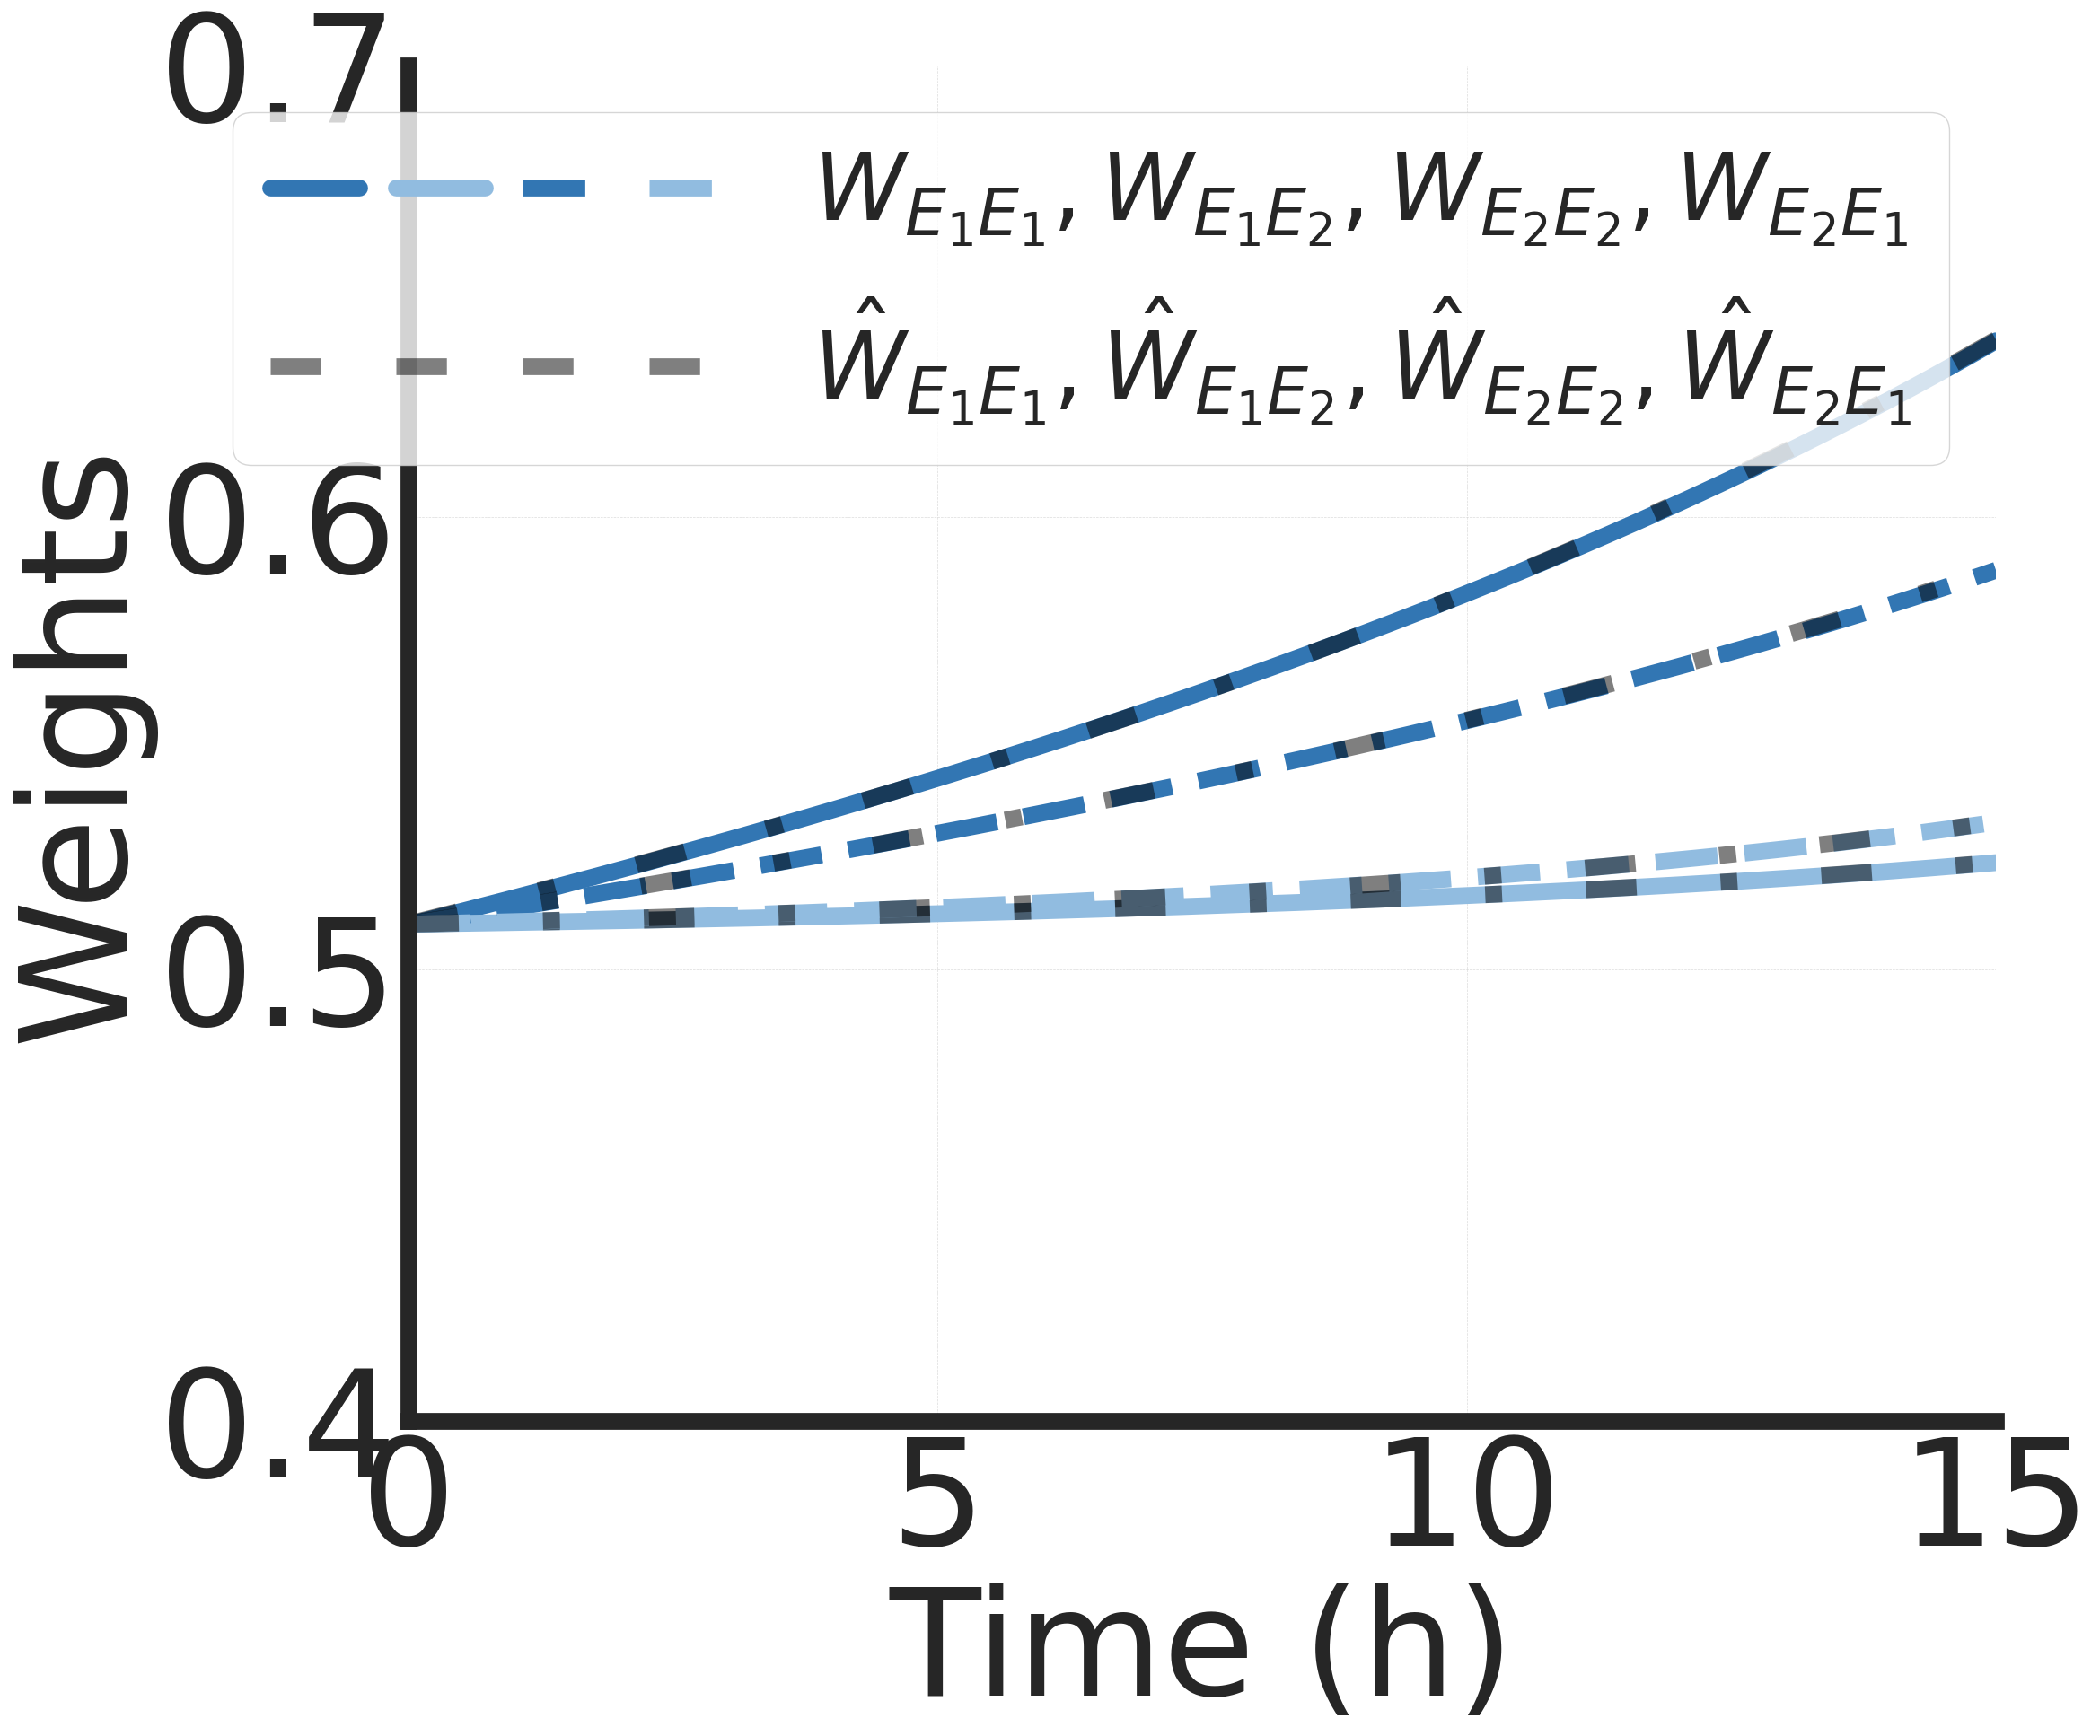

In [27]:
#for nice plot
# ymin = 0.45
# ymax = 0.65
# y_labels = [0.45,0.55,0.65]

#for paper
ymin = 0.4
ymax = 0.7
y_labels = [0.4,0.5,0.6,0.7]

eta = 1  # Learning rate
tau_hebb = 240  # Hebbian time constant

w_EiEj_0 = 0.51

# Function to compute w_{E_{i}E_{j}}
def w_EiEj(t, a_i_con, b_i_con, c_i_con, a_j_con, b_j_con, c_j_con, r_bs, eta, tau_hebb, w_EiEj_0):
    """
    Compute w_{E_{i}E_{j}}.
    
    Parameters:
        t: time (array or scalar)
        a_i_con, b_i_con, c_i_con: constants for neuron i
        a_j_con, b_j_con, c_j_con: constants for neuron j
        r_bs: baseline activity
        eta: learning rate
        tau_hebb: Hebbian time constant
        w_EiEj_0: initial value of w_{E_{i}E_{j}}
    
    Returns:
        w_{E_{i}E_{j}}
    """
    # Compute the static terms
    static_term1 = (a_i_con * a_j_con) / (b_i_con + b_j_con)
    static_term2 = (a_j_con * c_i_con - a_j_con * r_bs) / b_j_con
    static_term3 = (a_i_con * c_j_con) / b_i_con

    # Compute the dynamic terms
    dynamic_term1 = (a_i_con * a_j_con) / (b_i_con + b_j_con) * np.exp((b_i_con + b_j_con) * t)
    dynamic_term2 = (a_j_con * c_i_con - a_j_con * r_bs) / b_j_con * np.exp(b_j_con * t)
    dynamic_term3 = (a_i_con * c_j_con) / b_i_con * np.exp(b_i_con * t)
    dynamic_term4 = (c_i_con * c_j_con - c_j_con * r_bs) * t

    # Combine terms into the formula
    w_EiEj = (
        w_EiEj_0
        - (eta / tau_hebb) * (static_term1 + static_term2 + static_term3)
        + (eta / tau_hebb) * (dynamic_term1 + dynamic_term2 + dynamic_term3 + dynamic_term4)
    )

    return w_EiEj

# Combination configurations
combinations = [
    ('pop1-pop1', a_pop1, b_pop1, c_pop1, a_pop1, b_pop1, c_pop1),
    ('pop1-pop2', a_pop1, b_pop1, c_pop1, a_pop2, b_pop2, c_pop2),
    ('pop2-pop1', a_pop2, b_pop2, c_pop2, a_pop1, b_pop1, c_pop1),
    ('pop2-pop2', a_pop2, b_pop2, c_pop2, a_pop2, b_pop2, c_pop2)
]


# Data
# x_data = np.array(l_time_points_stim[2499:10000]) - l_time_points_stim[2499] 
x_data = l_time_points_stim 
print(len(x_data))
y1_data = np.array(l_res_weights[0][0][2499:10000])
y2_data = np.array(l_res_weights[0][3][2499:10000])
y3_data = np.array(l_res_weights[0][1][2499:10000])
y4_data = np.array(l_res_weights[0][2][2499:10000])

# Compute weights for all combinations
w_EiEj_results = {}
for label, a_i_con, b_i_con, c_i_con, a_j_con, b_j_con, c_j_con in combinations:
    w_EiEj_results[label] = w_EiEj(x_data, a_i_con, b_i_con, c_i_con, a_j_con, b_j_con, c_j_con, r_bs, eta, tau_hebb, w_EiEj_0)

# Assign computed weights to matches
y1_match = w_EiEj_results['pop1-pop1'][0:7501]
y2_match = w_EiEj_results['pop2-pop2'][0:7501]
y3_match = w_EiEj_results['pop1-pop2'][0:7501]
y4_match = w_EiEj_results['pop2-pop1'][0:7501]

weights_during_conditioning = (y1_match,y2_match,y3_match,y4_match)

print(f"Weight value at the end for:", y1_match[-1])
print(f"Weight value at the end for:", y2_match[-1])
print(f"Weight value at the end for:", y3_match[-1])
print(f"Weight value at the end for:", y4_match[-1])
# Compute R² values
r_squared1 = compute_r_squared(y1_data, y1_match, label="SubNetwork 1")
r_squared2 = compute_r_squared(y2_data, y2_match, label="SubNetwork 2")
r_squared3 = compute_r_squared(y3_data, y3_match, label="SubNetwork 3")
r_squared4 = compute_r_squared(y4_data, y4_match, label="SubNetwork 4")

# Plotting
plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)


# SubNetwork plots with the new style
e1, = plt.plot(x_data, y1_data, '-', color=color_list[0], linewidth=plot_line_width, label='$W_{E_1E_1}$')  # Solid line
fite1, = plt.plot(x_data, y1_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_1}$')  # Black dashed line

e2, = plt.plot(x_data, y2_data, '-', color=color_list[1], linewidth=plot_line_width, label='$W_{E_1E_2}$')  # Solid line
fite2, = plt.plot(x_data, y2_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_2}$')  # Black dashed line

e3, = plt.plot(x_data, y3_data, '--', color=color_list[0], linewidth=plot_line_width, label='$W_{E_2E_2}$')  # Dashed line
fite3, = plt.plot(x_data, y3_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_2}$')  # Black dashed line

e4, = plt.plot(x_data, y4_data, '--', color=color_list[1], linewidth=plot_line_width, label='$W_{E_2E_1}$')  # Dashed line
fite4, = plt.plot(x_data, y4_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_1}$')  # Black dashed line

# Legend update
plt.legend(
    [(e1, e2, e3, e4), (fite1, fite2, fite3, fite4)],
    [
        rf"$W_{{E_{{1}}E_{{1}}}}, W_{{E_{{1}}E_{{2}}}}, W_{{E_{{2}}E_{{2}}}}, W_{{E_{{2}}E_{{1}}}}$",
        rf"$\hat{{W}}_{{E_1E_1}}, \hat{{W}}_{{E_1E_2}}, \hat{{W}}_{{E_2E_2}}, \hat{{W}}_{{E_2E_1}}$",
    ],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    fontsize=legend_size,
    loc="upper right",
    handlelength=5
)


# Add labels, ticks, and grid
plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
plt.ylabel('Weights', fontsize=font_size_label, **hfont)
plt.xticks(fontsize=font_size_1, **hfont)
plt.yticks(fontsize=font_size_1, **hfont)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks([0,5,10,15], fontsize=font_size_1, **hfont)
plt.yticks(y_labels, fontsize=font_size_1, **hfont)
ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)


# Add R² text
r_squared1_text = f"R² = {r_squared1:.3f}"
r_squared2_text = f"R² = {r_squared2:.3f}"
r_squared3_text = f"R² = {r_squared3:.3f}"
r_squared4_text = f"R² = {r_squared4:.3f}"

# Save and display
plt.tight_layout()
plt.savefig(dir_plot_analytical + 'E_weights_during_conditioning' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'E_weights_during_conditioning' + id_p + '.png', format='png')
plt.show()


### analytical values extracted

In [ ]:
#For Full Model
# #analytical initial conditions
w1_0 = y1_match[-1]
w2_0 = y2_match[-1]
w3_0 = y3_match[-1]
w4_0 = y4_match[-1]

# Fitting weights AFTER conditioning

In [ ]:
#Load data again
from model_analysis import *
from plotting_functions import *

name_data = 'Case' + id_p + '_test_every_h' + '_k' + str(K).replace(".","")
with open(dir_data + name_data + '.pkl', 'rb') as file:
    l_results = pickle.load(file)
print('Data is read.')

[r_phase1, l_time_points_phase2, r_phase2, l_delta_rE1, av_threshold, delta_t, sampling_rate_sim,l_res_weights] = l_results
#  [l_time_points_stim, l_time_points_phase2, delta_t, sampling_rate, l_res_rates, l_res_weights, av_threshold, stim_times, stim_duration, sim_duration] = l_results

Data is read.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

R^2 for SubNetwork 1: 0.9892
R^2 for SubNetwork 2: 0.9820
R^2 for SubNetwork 3: 0.9891
R^2 for SubNetwork 4: 0.9820


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

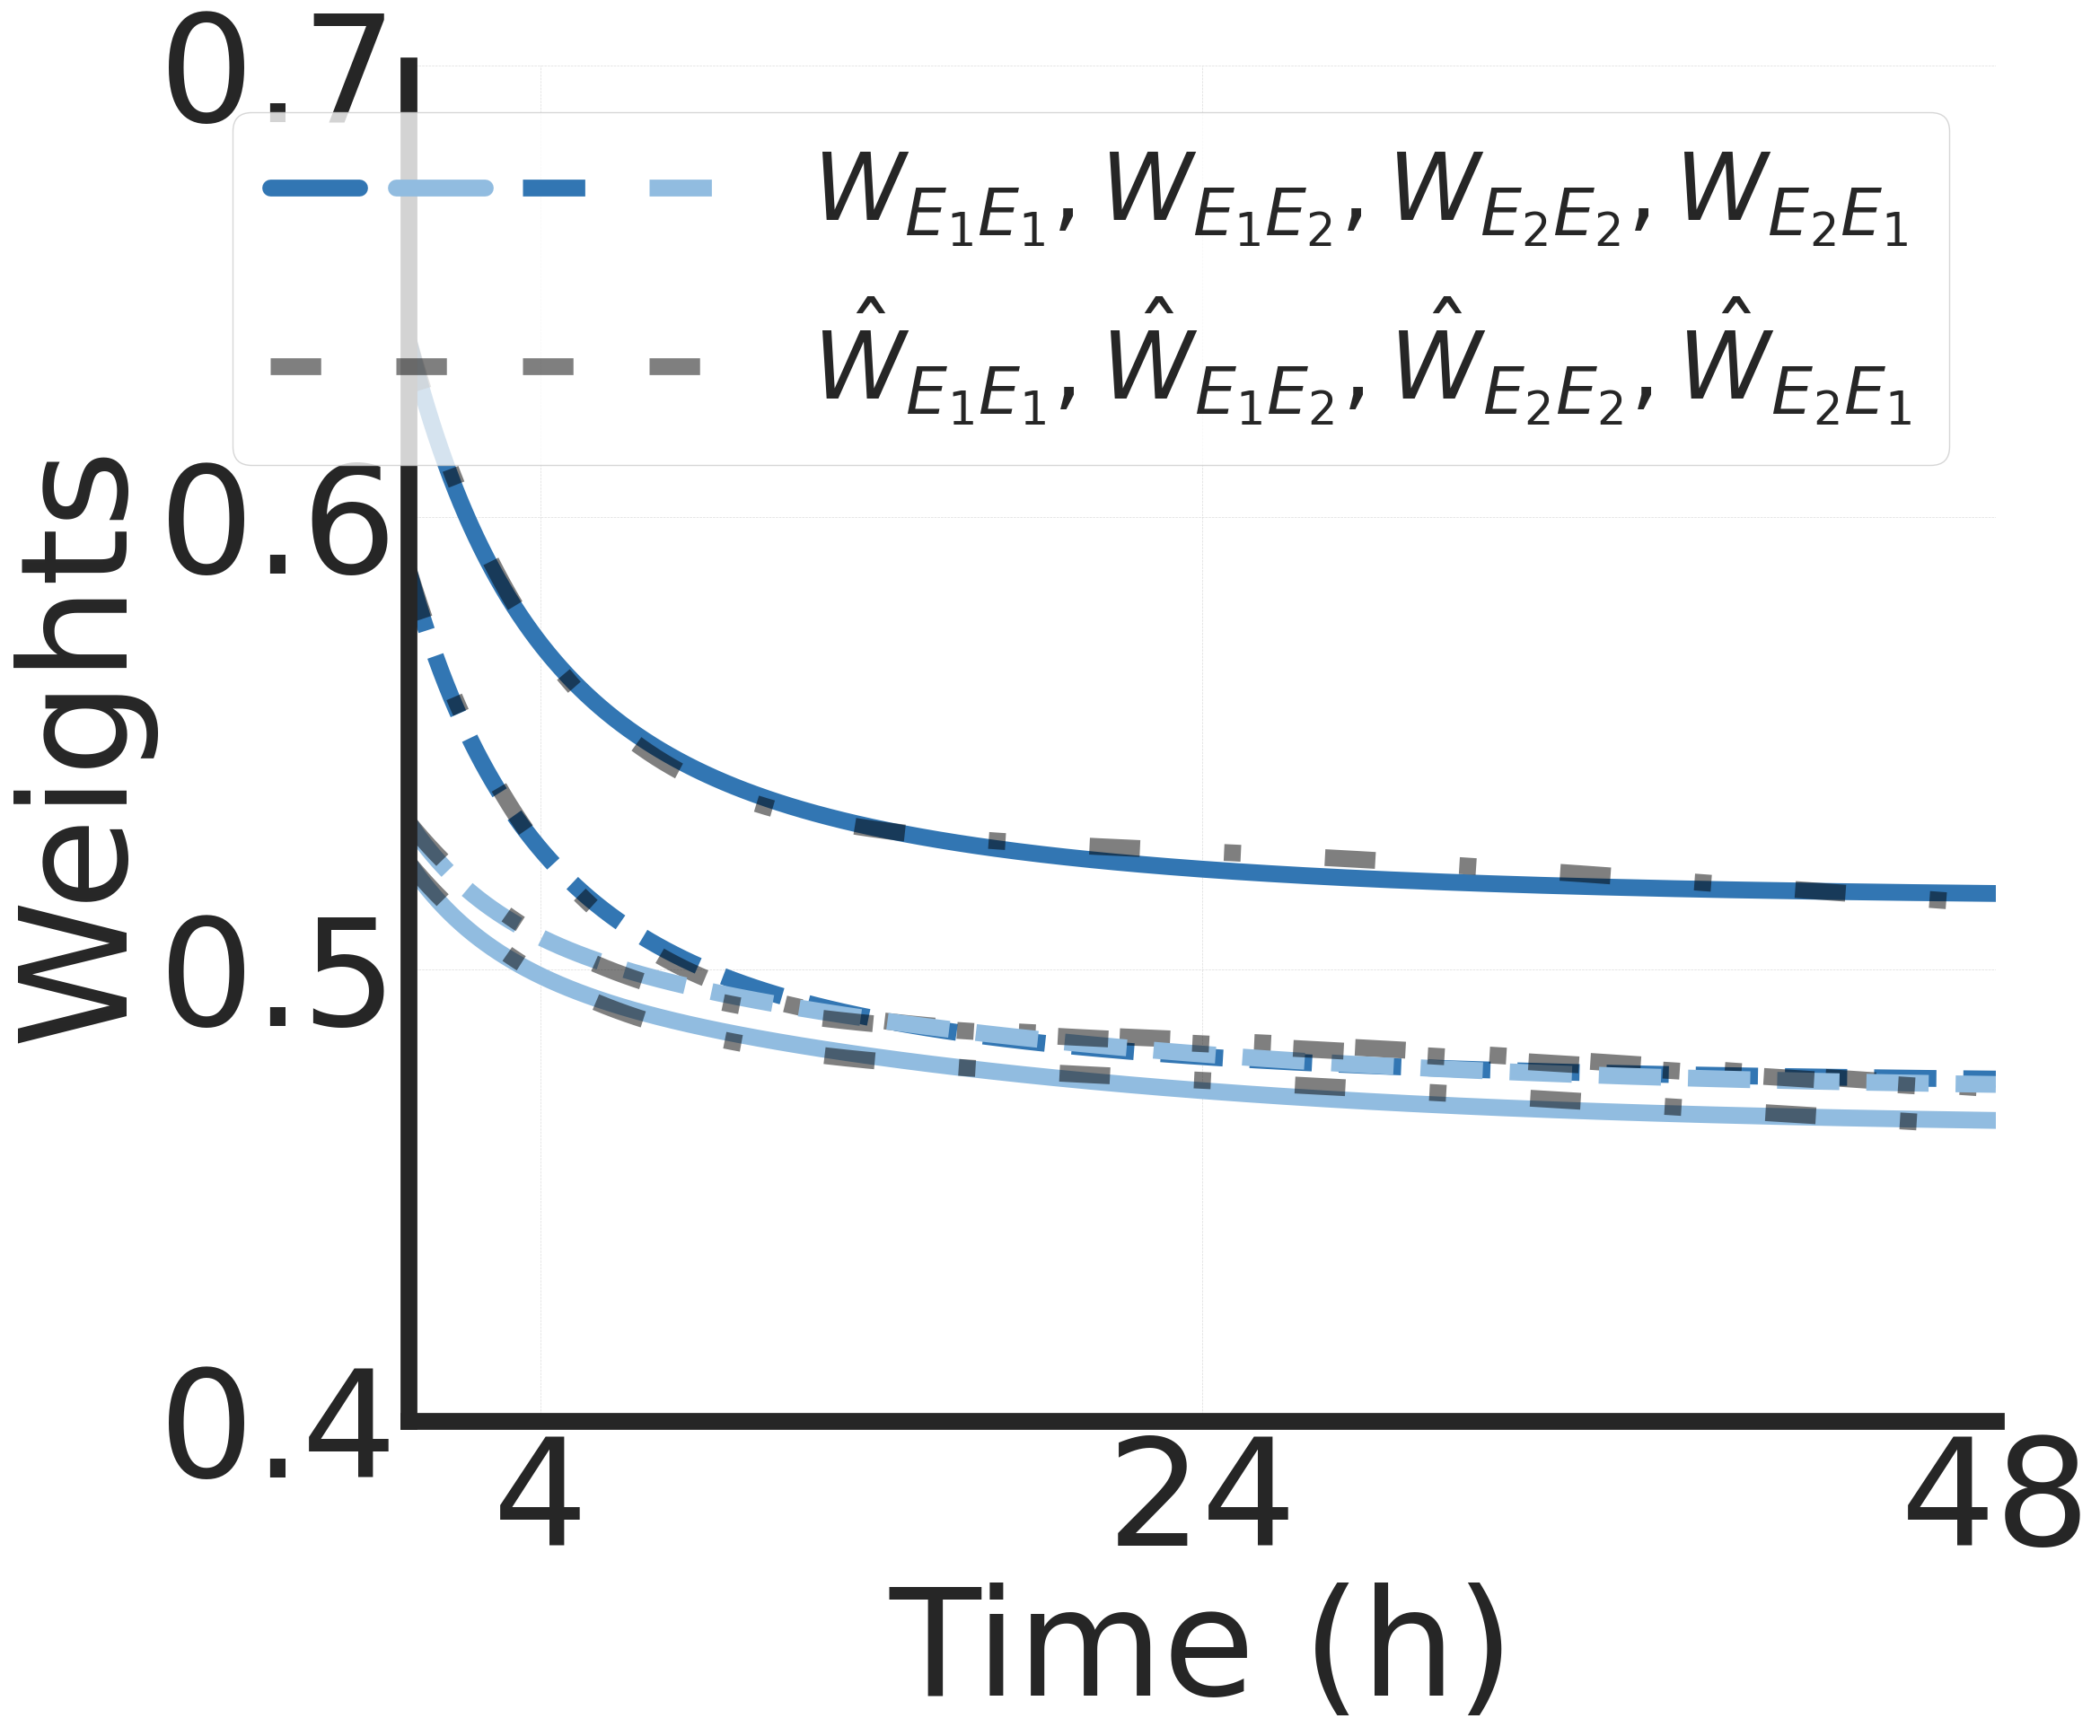

In [31]:
#for nice plot
# ymin = 0.45
# ymax = 0.65
# y_labels = [0.45,0.55,0.65]

#for paper
if id_p == '3':
    ymin = 0.1
    ymax = 0.7
    y_labels = [0.1,0.3,0.5,0.7]
else:
    ymin = 0.4
    ymax = 0.7
    y_labels = [0.4,0.5,0.6,0.7]
tau_ss = 8

#numerics initial conditions
# w1_0 = l_res_weights[1][0][3]
# w2_0 = l_res_weights[1][3][3]
# w3_0 = l_res_weights[1][1][3]
# w4_0 = l_res_weights[1][2][3]
#analytical initial conditions
# w1_0 = 0.6395310758111084
# w3_0 = 0.5886649961825243
# w2_0 = 0.5326285502475561
# w4_0 = 0.5236730028128919
# Define r(t)
def r_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def theta_func(x, a, b, c, r_bs, k, tau_b, tau_t):
    term1 = a / (1 - b * tau_b)
    term2 = (a + term1) / (2 - tau_t * b)
    term3 = (r_bs - k - term1 - c) / (2 - tau_t / tau_b)
    return (
        (r_bs - term2 - term3 - c) * np.exp(-2 * x / tau_t)
        + term2 * np.exp(-b * x)
        + term3 * np.exp(-x / tau_b)
        + c
    )

# Compute w(t) using vectorized integration
def build_w_vectorized(x_array, a, b, c, r_bs, k, tau_b, tau_t, tau_ss, w_0,PV_flag=False):
    sorted_indices = np.argsort(x_array)
    x_sorted = x_array[sorted_indices]
    t_max = x_sorted[-1]
    s_grid = np.linspace(0, t_max, len(x_sorted))
    r_vals = r_func(s_grid, a, b, c)
    theta_vals = theta_func(s_grid, a, b, c, r_bs, k, tau_b, tau_t)
    if PV_flag == True:
        integrand = -(1.0 - r_vals / theta_vals)
    else:
        integrand = (1.0 - r_vals / theta_vals)
    integral_vals = cumtrapz(integrand, s_grid, initial=0)
    integral_interp = interp1d(s_grid, integral_vals, kind='cubic')
    integral_at_x = integral_interp(x_sorted)
    w_sorted = w_0 * np.exp(integral_at_x / tau_ss)
    w_final = np.zeros_like(w_sorted)
    w_final[sorted_indices] = w_sorted
    return w_final
from scipy.integrate import solve_ivp
# ODE for d/dx [ln(w)] = (1/tau_ss) * [1 - r(x)/theta(x)]
def log_w_ode(x, y, a, b, c, r_bs, k, tau_b, tau_t, tau_ss):
    """
    y(x) = ln(w(x))
    dy/dx = (1/tau_ss) * [1 - r_func(x)/theta_func(x)]
    """
    r_val = r_func(x, a, b, c)
    theta_val = theta_func(x, a, b, c, r_bs, k, tau_b, tau_t)
    dydx = (1.0 / tau_ss) * (1.0 - r_val / theta_val)
    return np.array([dydx])  # Ensure this is a 1D array


def solve_w_worst_case(
    x_array, w0, a, b, c, r_bs, k, tau_b, tau_t, tau_ss,
    method='LSODA', rtol=1e-9, atol=1e-11
):
    """
    Solve for w(x) on the given x_array using the log-ODE approach.
    This is robust in “worst-case” scenarios (distinct exponent rates,
    large or small parameter values) because it integrates ln(w) directly.

    Parameters
    ----------
    x_array : 1D array
        The x-values at which we want w(x).
    w0 : float
        Initial value of w at x=0, i.e. w(0).
    a, b, c, r_bs, k, tau_b, tau_t, tau_ss : floats
        Model parameters.
    method : str
        ODE solver method, e.g. 'Radau', 'BDF', 'RK45', etc.
        'Radau' or 'BDF' can be more stable for stiff problems.
    rtol : float
        Relative tolerance for the solver.
    atol : float
        Absolute tolerance for the solver.

    Returns
    -------
    w_vals : 1D array
        Array of w(x) corresponding to x_array.
    """

    # We must solve the ODE from x=0 up to x=max(x_array)
    x_min = np.min(x_array)
    x_max = np.max(x_array)
    if x_min < 0:
        raise ValueError("This example requires x >= 0 (adjust code if needed).")

    # Initial condition in log-space
    y0 = [np.log(w0)]

    # Wrapper for solve_ivp
    def ode_wrapper(x, y):
        return log_w_ode(x, y, a, b, c, r_bs, k, tau_b, tau_t, tau_ss)

    # Solve the ODE across the entire range
    sol = solve_ivp(
        fun=ode_wrapper,
        t_span=(x_min, x_max),
        y0=y0,
        t_eval=x_array,    # get the solution specifically at x_array
        method=method,
        rtol=rtol,
        atol=atol
    )

    # Exponentiate the result to get w(x)
    w_vals = np.exp(sol.y[0])
    return w_vals

# Data
x_data = np.array(l_time_points_phase2[skip_first_time_points:])
y1_data = np.array(l_res_weights[1][0][skip_first_time_points:])
y2_data = np.array(l_res_weights[1][3][skip_first_time_points:])
y3_data = np.array(l_res_weights[1][1][skip_first_time_points:])
y4_data = np.array(l_res_weights[1][2][skip_first_time_points:])

x_data_analytics = np.linspace(np.min(x_data),np.max(x_data),len(x_data)*downsample_rate)

# Compute matches
y1_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, w1_0)
y2_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, w2_0)
y3_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, w3_0)
y4_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, w4_0)

weights_after_conditioning = (y1_match,y2_match,y3_match,y4_match)
# Compute matches
# y1_match = solve_w_worst_case(x_data_analytics, w1_0, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss)
# y2_match = solve_w_worst_case(x_data_analytics, w2_0, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss)
# y3_match = solve_w_worst_case(x_data_analytics, w3_0, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss)
# y4_match = solve_w_worst_case(x_data_analytics, w4_0, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss)

y1_match = y1_match[::downsample_rate]
y2_match = y2_match[::downsample_rate]
y3_match = y3_match[::downsample_rate]
y4_match = y4_match[::downsample_rate]


# Compute R² values
r_squared1 = compute_r_squared(y1_data, y1_match, label="SubNetwork 1")
r_squared2 = compute_r_squared(y2_data, y2_match, label="SubNetwork 2")
r_squared3 = compute_r_squared(y3_data, y3_match, label="SubNetwork 3")
r_squared4 = compute_r_squared(y4_data, y4_match, label="SubNetwork 4")

# Plotting
plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)

# SubNetwork plots with the new style
e1, = plt.plot(x_data, y1_data, '-', color=color_list[0], linewidth=plot_line_width, label='$W_{E_1E_1}$')  # Solid line
fite1, = plt.plot(x_data, y1_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_1}$')  # Black dashed line

e2, = plt.plot(x_data, y2_data, '-', color=color_list[1], linewidth=plot_line_width, label='$W_{E_1E_2}$')  # Solid line
fite2, = plt.plot(x_data, y2_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_2}$')  # Black dashed line

e3, = plt.plot(x_data, y3_data, '--', color=color_list[0], linewidth=plot_line_width, label='$W_{E_2E_2}$')  # Dashed line
fite3, = plt.plot(x_data, y3_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_2}$')  # Black dashed line

e4, = plt.plot(x_data, y4_data, '--', color=color_list[1], linewidth=plot_line_width, label='$W_{E_2E_1}$')  # Dashed line
fite4, = plt.plot(x_data, y4_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_1}$')  # Black dashed line

# Legend update
plt.legend(
    [(e1, e2, e3, e4), (fite1, fite2, fite3, fite4)],
    [
        rf"$W_{{E_{{1}}E_{{1}}}}, W_{{E_{{1}}E_{{2}}}}, W_{{E_{{2}}E_{{2}}}}, W_{{E_{{2}}E_{{1}}}}$",
        rf"$\hat{{W}}_{{E_1E_1}}, \hat{{W}}_{{E_1E_2}}, \hat{{W}}_{{E_2E_2}}, \hat{{W}}_{{E_2E_1}}$",
    ],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    fontsize=legend_size,
    loc="upper right",
    handlelength=5
)

# Add labels, ticks, and grid
plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
plt.ylabel('Weights', fontsize=font_size_label, **hfont)
plt.xticks(fontsize=font_size_1, **hfont)
plt.yticks(fontsize=font_size_1, **hfont)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
plt.yticks(y_labels, fontsize=font_size_1, **hfont)
ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)


# Add R² text
r_squared1_text = f"R² = {r_squared1:.3f}"
r_squared2_text = f"R² = {r_squared2:.3f}"
r_squared3_text = f"R² = {r_squared3:.3f}"
r_squared4_text = f"R² = {r_squared4:.3f}"

# Save and display
plt.tight_layout()
plt.savefig(dir_plot_analytical + 'long_E_weights_match' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'long_E_weights_match' + id_p + '.png', format='png')
plt.show()


## Fitting PV-E and SST-E in the same way

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

R^2 for SubNetwork 1: 0.9860
R^2 for SubNetwork 2: 0.9801
R^2 for SubNetwork 3: 0.9860
R^2 for SubNetwork 4: 0.9801


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

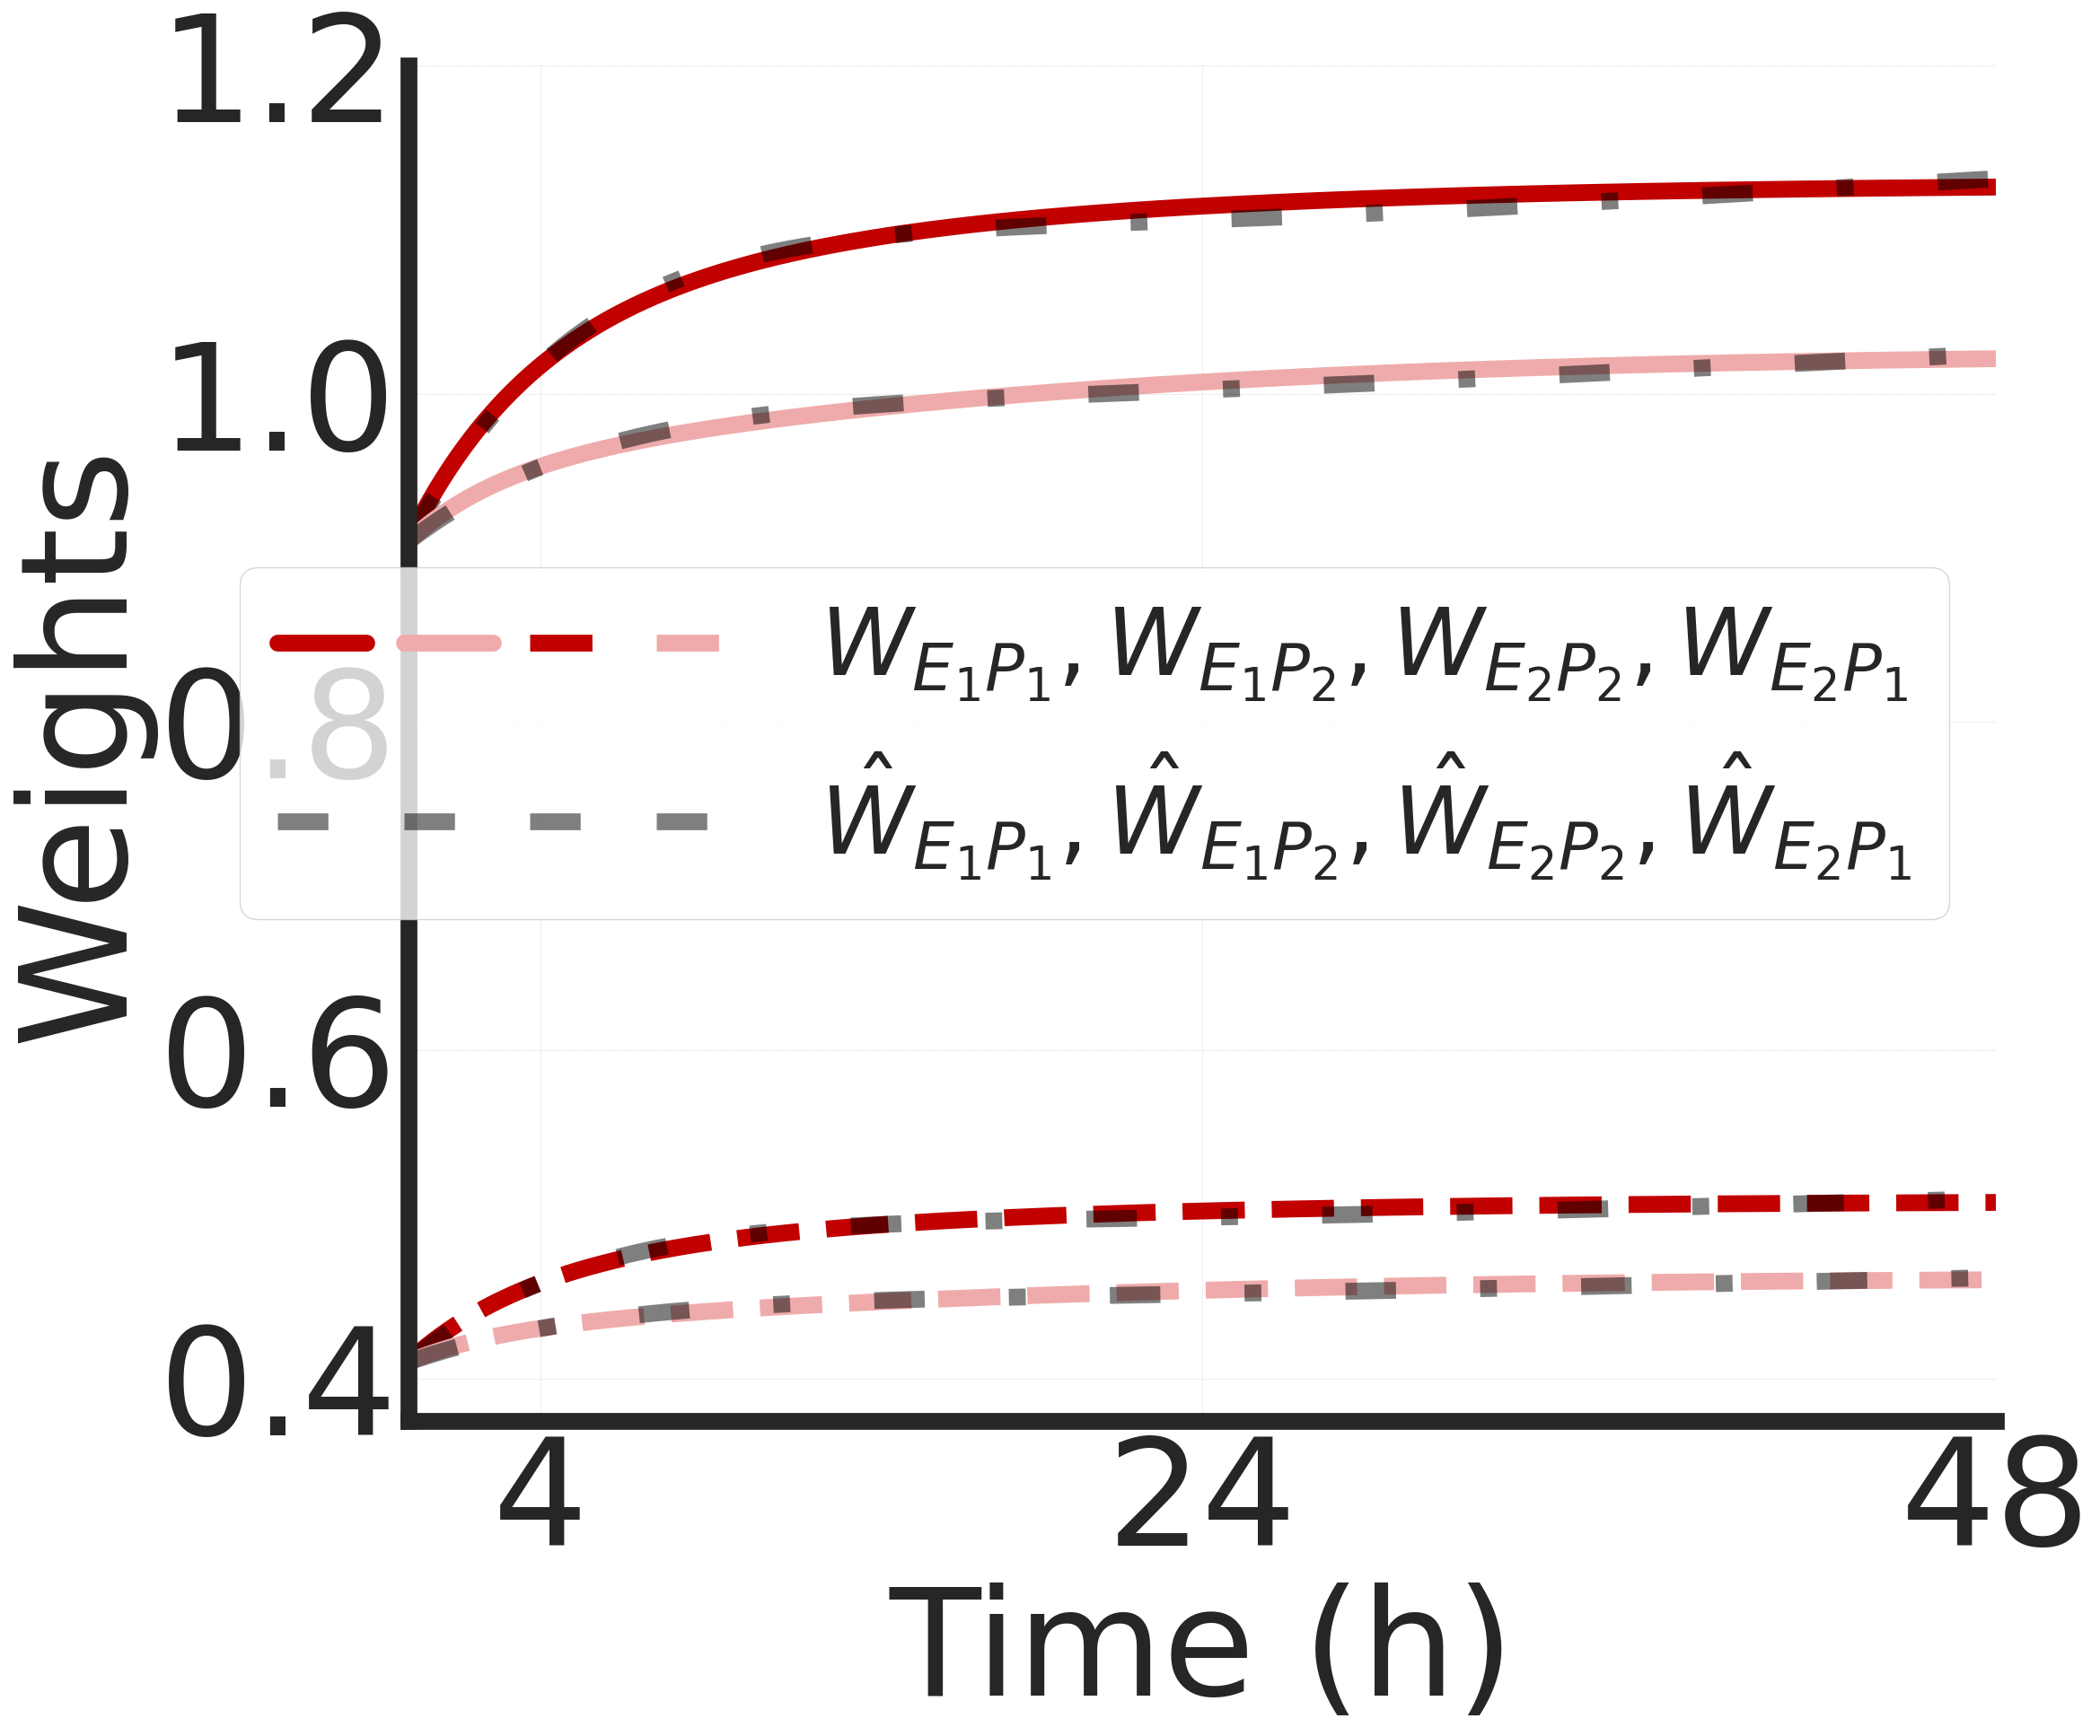

In [32]:
if id_p == '3':
    wp1_0 = 0.91
    wp2_0 = 0.91
    wp3_0 = 0.41
    wp4_0 = 0.41
else:
    #for nice plot
    # ymin = 0.45
    # ymax = 0.65
    # y_labels = [0.45,0.55,0.65]

    #for paper
    ymin = 0.4
    ymax = 1.2
    y_labels = [0.4,0.6,0.8,1.0,1.2]

    #Numerics
    # wp1_0 = l_res_weights[1][4][2]
    # wp2_0 = l_res_weights[1][7][2]
    # wp3_0 = l_res_weights[1][5][2]
    # wp4_0 = l_res_weights[1][6][2]
    #Analytics
    wp1_0 = 0.91
    wp2_0 = 0.91
    wp3_0 = 0.41
    wp4_0 = 0.41

    # Data
    x_data = np.array(l_time_points_phase2[skip_first_time_points:])
    y1_data = np.array(l_res_weights[1][4][skip_first_time_points:])
    y2_data = np.array(l_res_weights[1][7][skip_first_time_points:])
    y3_data = np.array(l_res_weights[1][5][skip_first_time_points:])
    y4_data = np.array(l_res_weights[1][6][skip_first_time_points:])
    
    x_data_analytics = np.linspace(np.min(x_data),np.max(x_data),len(x_data)*downsample_rate)

    # Compute matches
    y1_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, wp1_0,PV_flag=True)
    y2_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, wp2_0,PV_flag=True)
    y3_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, wp3_0,PV_flag=True)
    y4_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, wp4_0,PV_flag=True)
    
 
    y1_match = y1_match[::downsample_rate]
    y2_match = y2_match[::downsample_rate]
    y3_match = y3_match[::downsample_rate]
    y4_match = y4_match[::downsample_rate]
    
    weights_after_conditioning_PV = (y1_match,y2_match,y3_match,y4_match)

    # Compute R² values
    r_squared1 = compute_r_squared(y1_data, y1_match, label="SubNetwork 1")
    r_squared2 = compute_r_squared(y2_data, y2_match, label="SubNetwork 2")
    r_squared3 = compute_r_squared(y3_data, y3_match, label="SubNetwork 3")
    r_squared4 = compute_r_squared(y4_data, y4_match, label="SubNetwork 4")

    # Plotting
    plt.figure(figsize=(figure_width, figure_len))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(line_width)

    # SubNetwork plots with the new style
    e1, = plt.plot(x_data, y1_data, '-', color=color_list[2], linewidth=plot_line_width, label='$W_{E_1E_1}$')  # Solid line
    fite1, = plt.plot(x_data, y1_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_1}$')  # Black dashed line

    e2, = plt.plot(x_data, y2_data, '-', color=color_list[3], linewidth=plot_line_width, label='$W_{E_1E_2}$')  # Solid line
    fite2, = plt.plot(x_data, y2_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_2}$')  # Black dashed line

    e3, = plt.plot(x_data, y3_data, '--', color=color_list[2], linewidth=plot_line_width, label='$W_{E_2E_2}$')  # Dashed line
    fite3, = plt.plot(x_data, y3_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_2}$')  # Black dashed line

    e4, = plt.plot(x_data, y4_data, '--', color=color_list[3], linewidth=plot_line_width, label='$W_{E_2E_1}$')  # Dashed line
    fite4, = plt.plot(x_data, y4_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_1}$')  # Black dashed line

    # Legend update
    plt.legend(
        [(e1, e2, e3, e4), (fite1, fite2, fite3, fite4)],
        [
            rf"$W_{{E_{{1}}P_{{1}}}}, W_{{E_{{1}}P_{{2}}}}, W_{{E_{{2}}P_{{2}}}}, W_{{E_{{2}}P_{{1}}}}$",
            rf"$\hat{{W}}_{{E_1P_1}}, \hat{{W}}_{{E_1P_2}}, \hat{{W}}_{{E_2P_2}}, \hat{{W}}_{{E_2P_1}}$",
        ],
        handler_map={tuple: HandlerTuple(ndivide=None)},
        fontsize=legend_size,
        loc="center right",
        handlelength=5
    )

    # Add labels, ticks, and grid
    plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
    plt.ylabel('Weights', fontsize=font_size_label, **hfont)
    plt.xticks(fontsize=font_size_1, **hfont)
    plt.yticks(fontsize=font_size_1, **hfont)
    plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
    plt.yticks(y_labels, fontsize=font_size_1, **hfont)
    ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)


    # Add R² text
    r_squared1_text = f"R² = {r_squared1:.3f}"
    r_squared2_text = f"R² = {r_squared2:.3f}"
    r_squared3_text = f"R² = {r_squared3:.3f}"
    r_squared4_text = f"R² = {r_squared4:.3f}"

    # Save and display
    plt.tight_layout()
    plt.savefig(dir_plot_analytical + 'long_PV_weights_match' + id_p + '.pdf', format='pdf')
    plt.savefig(dir_plot_analytical + 'long_PV_weights_match' + id_p + '.png', format='png')
    plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


R^2 for SubNetwork 1: 0.9889
R^2 for SubNetwork 2: 0.9819
R^2 for SubNetwork 3: 0.9889
R^2 for SubNetwork 4: 0.9819


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

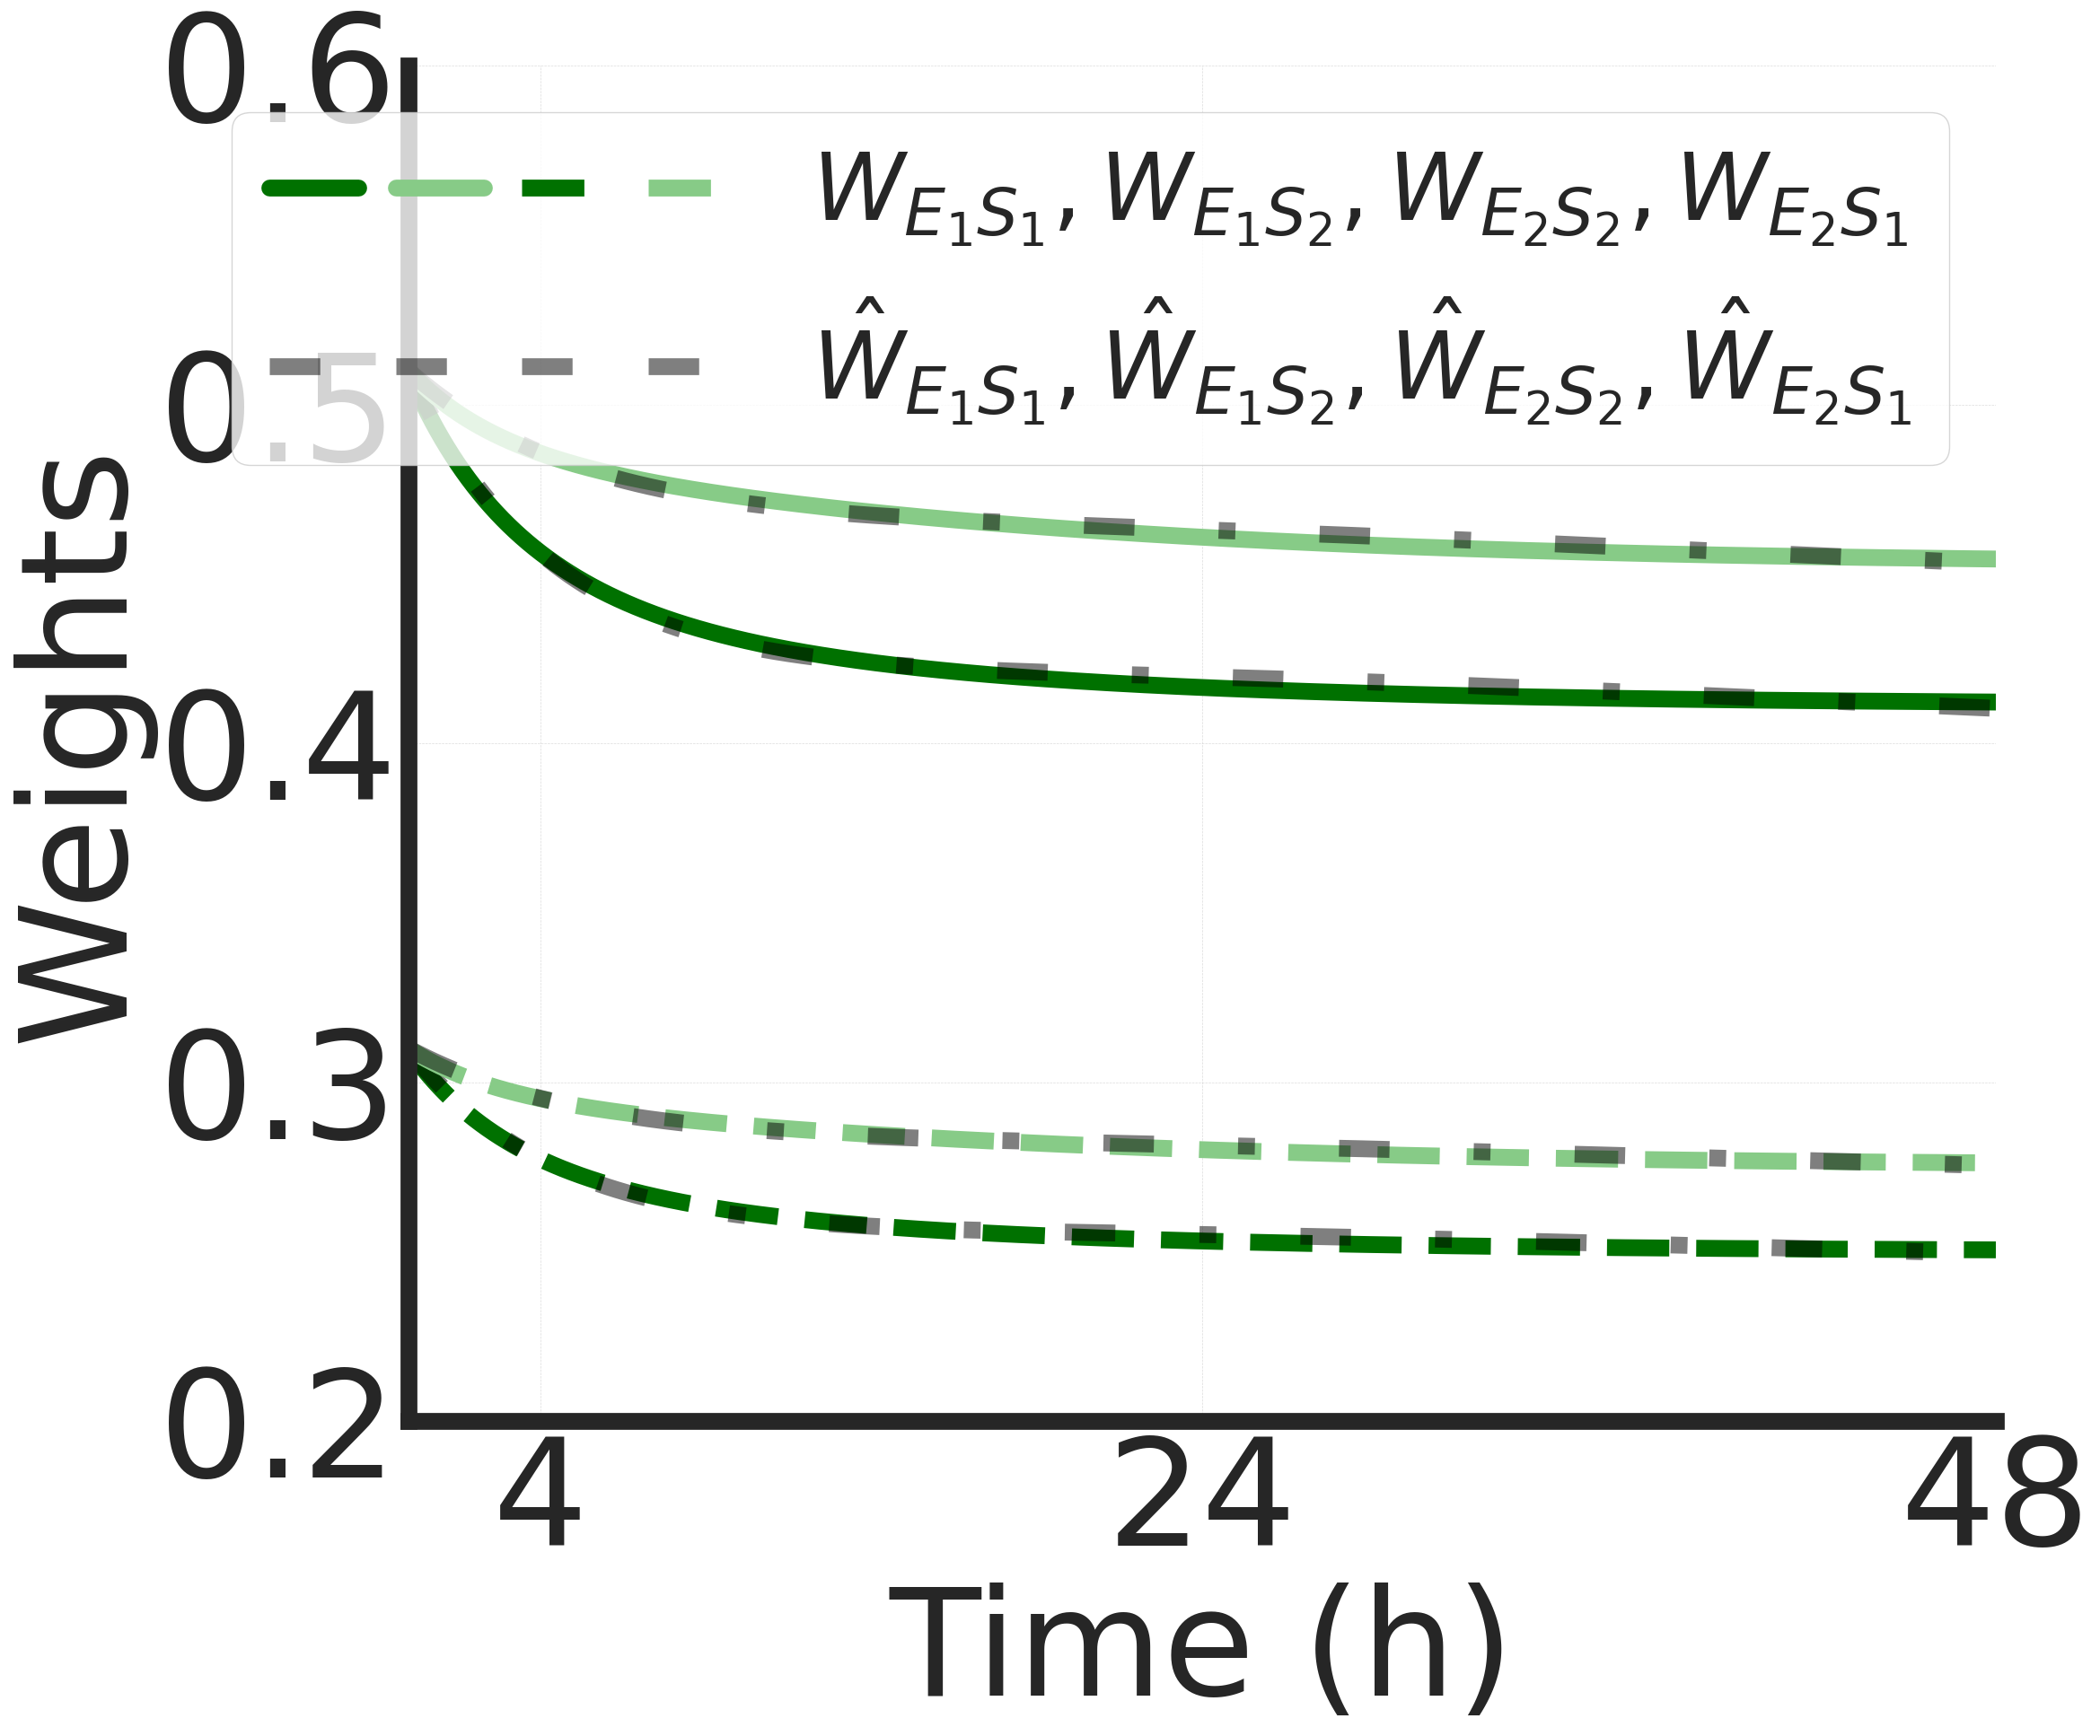

In [33]:
if id_p == '4':
    ws1_0 = 0.51
    ws2_0 = 0.51
    ws3_0 = 0.31
    ws4_0 = 0.31
else:
    #for nice plot
    # ymin = 0.45
    # ymax = 0.65
    # y_labels = [0.45,0.55,0.65]

    #for paper
    ymin = 0.2
    ymax = 0.6
    y_labels = [0.2,0.3,0.4,0.5,0.6]

    #Numerics
    ws1_0 = l_res_weights[1][8][2]
    ws2_0 = l_res_weights[1][11][2]
    ws3_0 = l_res_weights[1][9][2]
    ws4_0 = l_res_weights[1][10][2]
    #Analytics
    ws1_0 = 0.51
    ws2_0 = 0.51
    ws3_0 = 0.31
    ws4_0 = 0.31

    # Data
    x_data = np.array(l_time_points_phase2[skip_first_time_points:])
    y1_data = np.array(l_res_weights[1][8][skip_first_time_points:])
    y2_data = np.array(l_res_weights[1][11][skip_first_time_points:])
    y3_data = np.array(l_res_weights[1][9][skip_first_time_points:])
    y4_data = np.array(l_res_weights[1][10][skip_first_time_points:])
    
    x_data_analytics = np.linspace(np.min(x_data),np.max(x_data),len(x_data)*downsample_rate)

    # Compute matches
    y1_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, ws1_0,PV_flag=False)
    y2_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, ws2_0,PV_flag=False)
    y3_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, ws3_0,PV_flag=False)
    y4_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, ws4_0,PV_flag=False)
    

    y1_match = y1_match[::downsample_rate]
    y2_match = y2_match[::downsample_rate]
    y3_match = y3_match[::downsample_rate]
    y4_match = y4_match[::downsample_rate]

    weights_after_conditioning_SST = (y1_match,y2_match,y3_match,y4_match)
    # Compute R² values
    r_squared1 = compute_r_squared(y1_data, y1_match, label="SubNetwork 1")
    r_squared2 = compute_r_squared(y2_data, y2_match, label="SubNetwork 2")
    r_squared3 = compute_r_squared(y3_data, y3_match, label="SubNetwork 3")
    r_squared4 = compute_r_squared(y4_data, y4_match, label="SubNetwork 4")

    # Plotting
    plt.figure(figsize=(figure_width, figure_len))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(line_width)


    # SubNetwork plots with the new style
    e1, = plt.plot(x_data, y1_data, '-', color=color_list[4], linewidth=plot_line_width, label='$W_{E_1E_1}$')  # Solid line
    fite1, = plt.plot(x_data, y1_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_1}$')  # Black dashed line

    e2, = plt.plot(x_data, y2_data, '-', color=color_list[5], linewidth=plot_line_width, label='$W_{E_1E_2}$')  # Solid line
    fite2, = plt.plot(x_data, y2_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_1E_2}$')  # Black dashed line

    e3, = plt.plot(x_data, y3_data, '--', color=color_list[4], linewidth=plot_line_width, label='$W_{E_2E_2}$')  # Dashed line
    fite3, = plt.plot(x_data, y3_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_2}$')  # Black dashed line

    e4, = plt.plot(x_data, y4_data, '--', color=color_list[5], linewidth=plot_line_width, label='$W_{E_2E_1}$')  # Dashed line
    fite4, = plt.plot(x_data, y4_match, linestyle=line_style_r_an, color='black', alpha=0.5,linewidth=plot_line_width, label='$\hat{W}_{E_2E_1}$')  # Black dashed line

    # Legend update
    plt.legend(
        [(e1, e2, e3, e4), (fite1, fite2, fite3, fite4)],
        [
            rf"$W_{{E_{{1}}S_{{1}}}}, W_{{E_{{1}}S_{{2}}}}, W_{{E_{{2}}S_{{2}}}}, W_{{E_{{2}}S_{{1}}}}$",
            rf"$\hat{{W}}_{{E_1S_1}}, \hat{{W}}_{{E_1S_2}}, \hat{{W}}_{{E_2S_2}}, \hat{{W}}_{{E_2S_1}}$",
        ],
        handler_map={tuple: HandlerTuple(ndivide=None)},
        fontsize=legend_size,
        loc="upper right",
        handlelength=5
    )


    # Add labels, ticks, and grid
    plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
    plt.ylabel('Weights', fontsize=font_size_label, **hfont)
    plt.xticks(fontsize=font_size_1, **hfont)
    plt.yticks(fontsize=font_size_1, **hfont)
    plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
    plt.yticks(y_labels, fontsize=font_size_1, **hfont)
    ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)


    # Add R² text
    r_squared1_text = f"R² = {r_squared1:.3f}"
    r_squared2_text = f"R² = {r_squared2:.3f}"
    r_squared3_text = f"R² = {r_squared3:.3f}"
    r_squared4_text = f"R² = {r_squared4:.3f}"

    # Save and display
    plt.tight_layout()
    plt.savefig(dir_plot_analytical + 'long_SST_weights_match' + id_p + '.pdf', format='pdf')
    plt.savefig(dir_plot_analytical + 'long_SST_weights_match' + id_p + '.png', format='png')
    plt.show()


## Example on how to define the Weight matrix over time analytically

In [34]:
#Numerics
# w1_0 = l_res_weights[1][0][3]
# w2_0 = l_res_weights[1][3][3]
# w3_0 = l_res_weights[1][1][3]
# w4_0 = l_res_weights[1][2][3]

# wp1_0 = l_res_weights[1][4][2]
# wp2_0 = l_res_weights[1][7][2]
# wp3_0 = l_res_weights[1][5][2]
# wp4_0 = l_res_weights[1][6][2]

# ws1_0 = l_res_weights[1][8][2]
# ws2_0 = l_res_weights[1][11][2]
# ws3_0 = l_res_weights[1][9][2]
# ws4_0 = l_res_weights[1][10][2]
#Analytics (for full model)
# w1_0 = 0.637391911995258
# w3_0 = 0.587402808190454
# w2_0 = 0.5320960971046548
# w4_0 = 0.5233588353594223

# wp1_0 = 0.91
# wp2_0 = 0.91
# wp3_0 = 0.41
# wp4_0 = 0.41

# ws1_0 = 0.51
# ws2_0 = 0.51
# ws3_0 = 0.31
# ws4_0 = 0.31

x_data_analytics = np.linspace(np.min(x_data),np.max(x_data),len(x_data)*downsample_rate)

# Compute matches
wE1E1_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, w1_0)
wE2E2_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, w2_0)
wE1E2_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, w3_0)
wE2E1_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, w4_0)

wE1E1_match = wE1E1_match[::downsample_rate]
wE2E2_match = wE2E2_match[::downsample_rate]
wE1E2_match = wE1E2_match[::downsample_rate]
wE2E1_match = wE2E1_match[::downsample_rate]


if id_p == '3':
    wE1P1_match = np.ones(len(x_data)) * wp1_0
    wE2P2_match = np.ones(len(x_data)) * wp2_0
    wE1P2_match = np.ones(len(x_data)) * wp3_0
    wE2P1_match = np.ones(len(x_data)) * wp4_0
else:
    wE1P1_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, wp1_0,PV_flag=True)
    wE2P2_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, wp2_0,PV_flag=True)
    wE1P2_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, wp3_0,PV_flag=True)
    wE2P1_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, wp4_0,PV_flag=True)

    wE1P1_match = wE1P1_match[::downsample_rate]
    wE2P2_match = wE2P2_match[::downsample_rate]
    wE1P2_match = wE1P2_match[::downsample_rate]
    wE2P1_match = wE2P1_match[::downsample_rate]
if id_p == '4':
    wE1S1_match = np.ones(len(x_data)) * ws1_0
    wE2S2_match = np.ones(len(x_data)) * ws2_0
    wE1S2_match = np.ones(len(x_data)) * ws3_0
    wE2S1_match = np.ones(len(x_data)) * ws4_0
else:
    wE1S1_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, ws1_0,PV_flag=False)
    wE2S2_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, ws2_0,PV_flag=False)
    wE1S2_match = build_w_vectorized(x_data_analytics, a1, b1, c1, r_bs, k, tau_b, tau_t, tau_ss, ws3_0,PV_flag=False)
    wE2S1_match = build_w_vectorized(x_data_analytics, a2, b2, c2, r_bs, k, tau_b, tau_t, tau_ss, ws4_0,PV_flag=False)

    wE1S1_match = wE1S1_match[::downsample_rate]
    wE2S2_match = wE2S2_match[::downsample_rate]
    wE1S2_match = wE1S2_match[::downsample_rate]
    wE2S1_match = wE2S1_match[::downsample_rate]
# Constant weights
w_PE_within = 0.3
w_PE_cross = 0.1
w_PP_within = 0.2
w_PP_cross = 0.1
w_PS_within = 0.3
w_PS_cross = 0.1
w_SE_within = 0.4
w_SE_cross = 0.1


i=0
W = np.array([
    # Row 1 (E1 dynamics)
    [wE1E1_match[i], -wE1P1_match[i], -wE1S1_match[i], wE1E2_match[i], -wE1P2_match[i], -wE1S2_match[i]],
    # Row 2 (P1 dynamics)
    [w_PE_within, -w_PP_within, -w_PS_within, w_PE_cross, -w_PP_cross, -w_PS_cross],
    # Row 3 (S1 dynamics)
    [w_SE_within, 0, 0, w_SE_cross, 0, 0],
    # Row 4 (E2 dynamics)
    [wE2E1_match[i], -wE2P1_match[i], -wE2S1_match[i], wE2E2_match[i], -wE2P2_match[i], -wE2S2_match[i]],
    # Row 5 (P2 dynamics)
    [w_PE_cross, -w_PP_cross, -w_PS_cross, w_PE_within, -w_PP_within, -w_PS_within],
    # Row 6 (S2 dynamics)
    [w_SE_cross, 0, 0, w_SE_within, 0, 0]
])

# Print the matrix to verify
print(f"Matrix W at index {i}:")
print(W)

Matrix W at index 0:
[[ 0.63904773 -0.9104109  -0.50976982  0.58829486 -0.41018513 -0.30986009]
 [ 0.3        -0.2        -0.3         0.1        -0.1        -0.1       ]
 [ 0.4         0.          0.          0.1         0.          0.        ]
 [ 0.53248052 -0.41007689 -0.30994187  0.52354628 -0.91017066 -0.50990437]
 [ 0.1        -0.1        -0.1         0.3        -0.2        -0.3       ]
 [ 0.1         0.          0.          0.4         0.          0.        ]]


In [20]:
# #original matrix for safety check
# w_EP_within = 0.91; w_EP_cross = 0.41
# w_ES_within = 0.51; w_ES_cross = 0.31
# w_EE_within = 0.51; w_EE_cross = 0.51
# #original matrix
# W = np.array([
#     # Row 1: E1 dynamics
#     [w_EE_within, -w_EP_within, -w_ES_within, w_EE_cross, -w_EP_cross, -w_ES_cross],
#     # Row 2: P1 dynamics
#     [w_PE_within, -w_PP_within, -w_PS_within, w_PE_cross, -w_PP_cross, -w_PS_cross],
#     # Row 3: S1 dynamics
#     [w_SE_within, 0, 0, w_SE_cross, 0, 0],
#     # Row 4: E2 dynamics
#     [w_EE_cross, -w_EP_cross, -w_ES_cross, w_EE_within, -w_EP_within, -w_ES_within],
#     # Row 5: P2 dynamics
#     [w_PE_cross, -w_PP_cross, -w_PS_cross, w_PE_within, -w_PP_within, -w_PS_within],
#     # Row 6: S2 dynamics
#     [w_SE_cross, 0, 0, w_SE_within, 0, 0]
# ])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

R^2 for SubNetwork 1: 0.9863
R^2 for SubNetwork 2: 0.9834


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

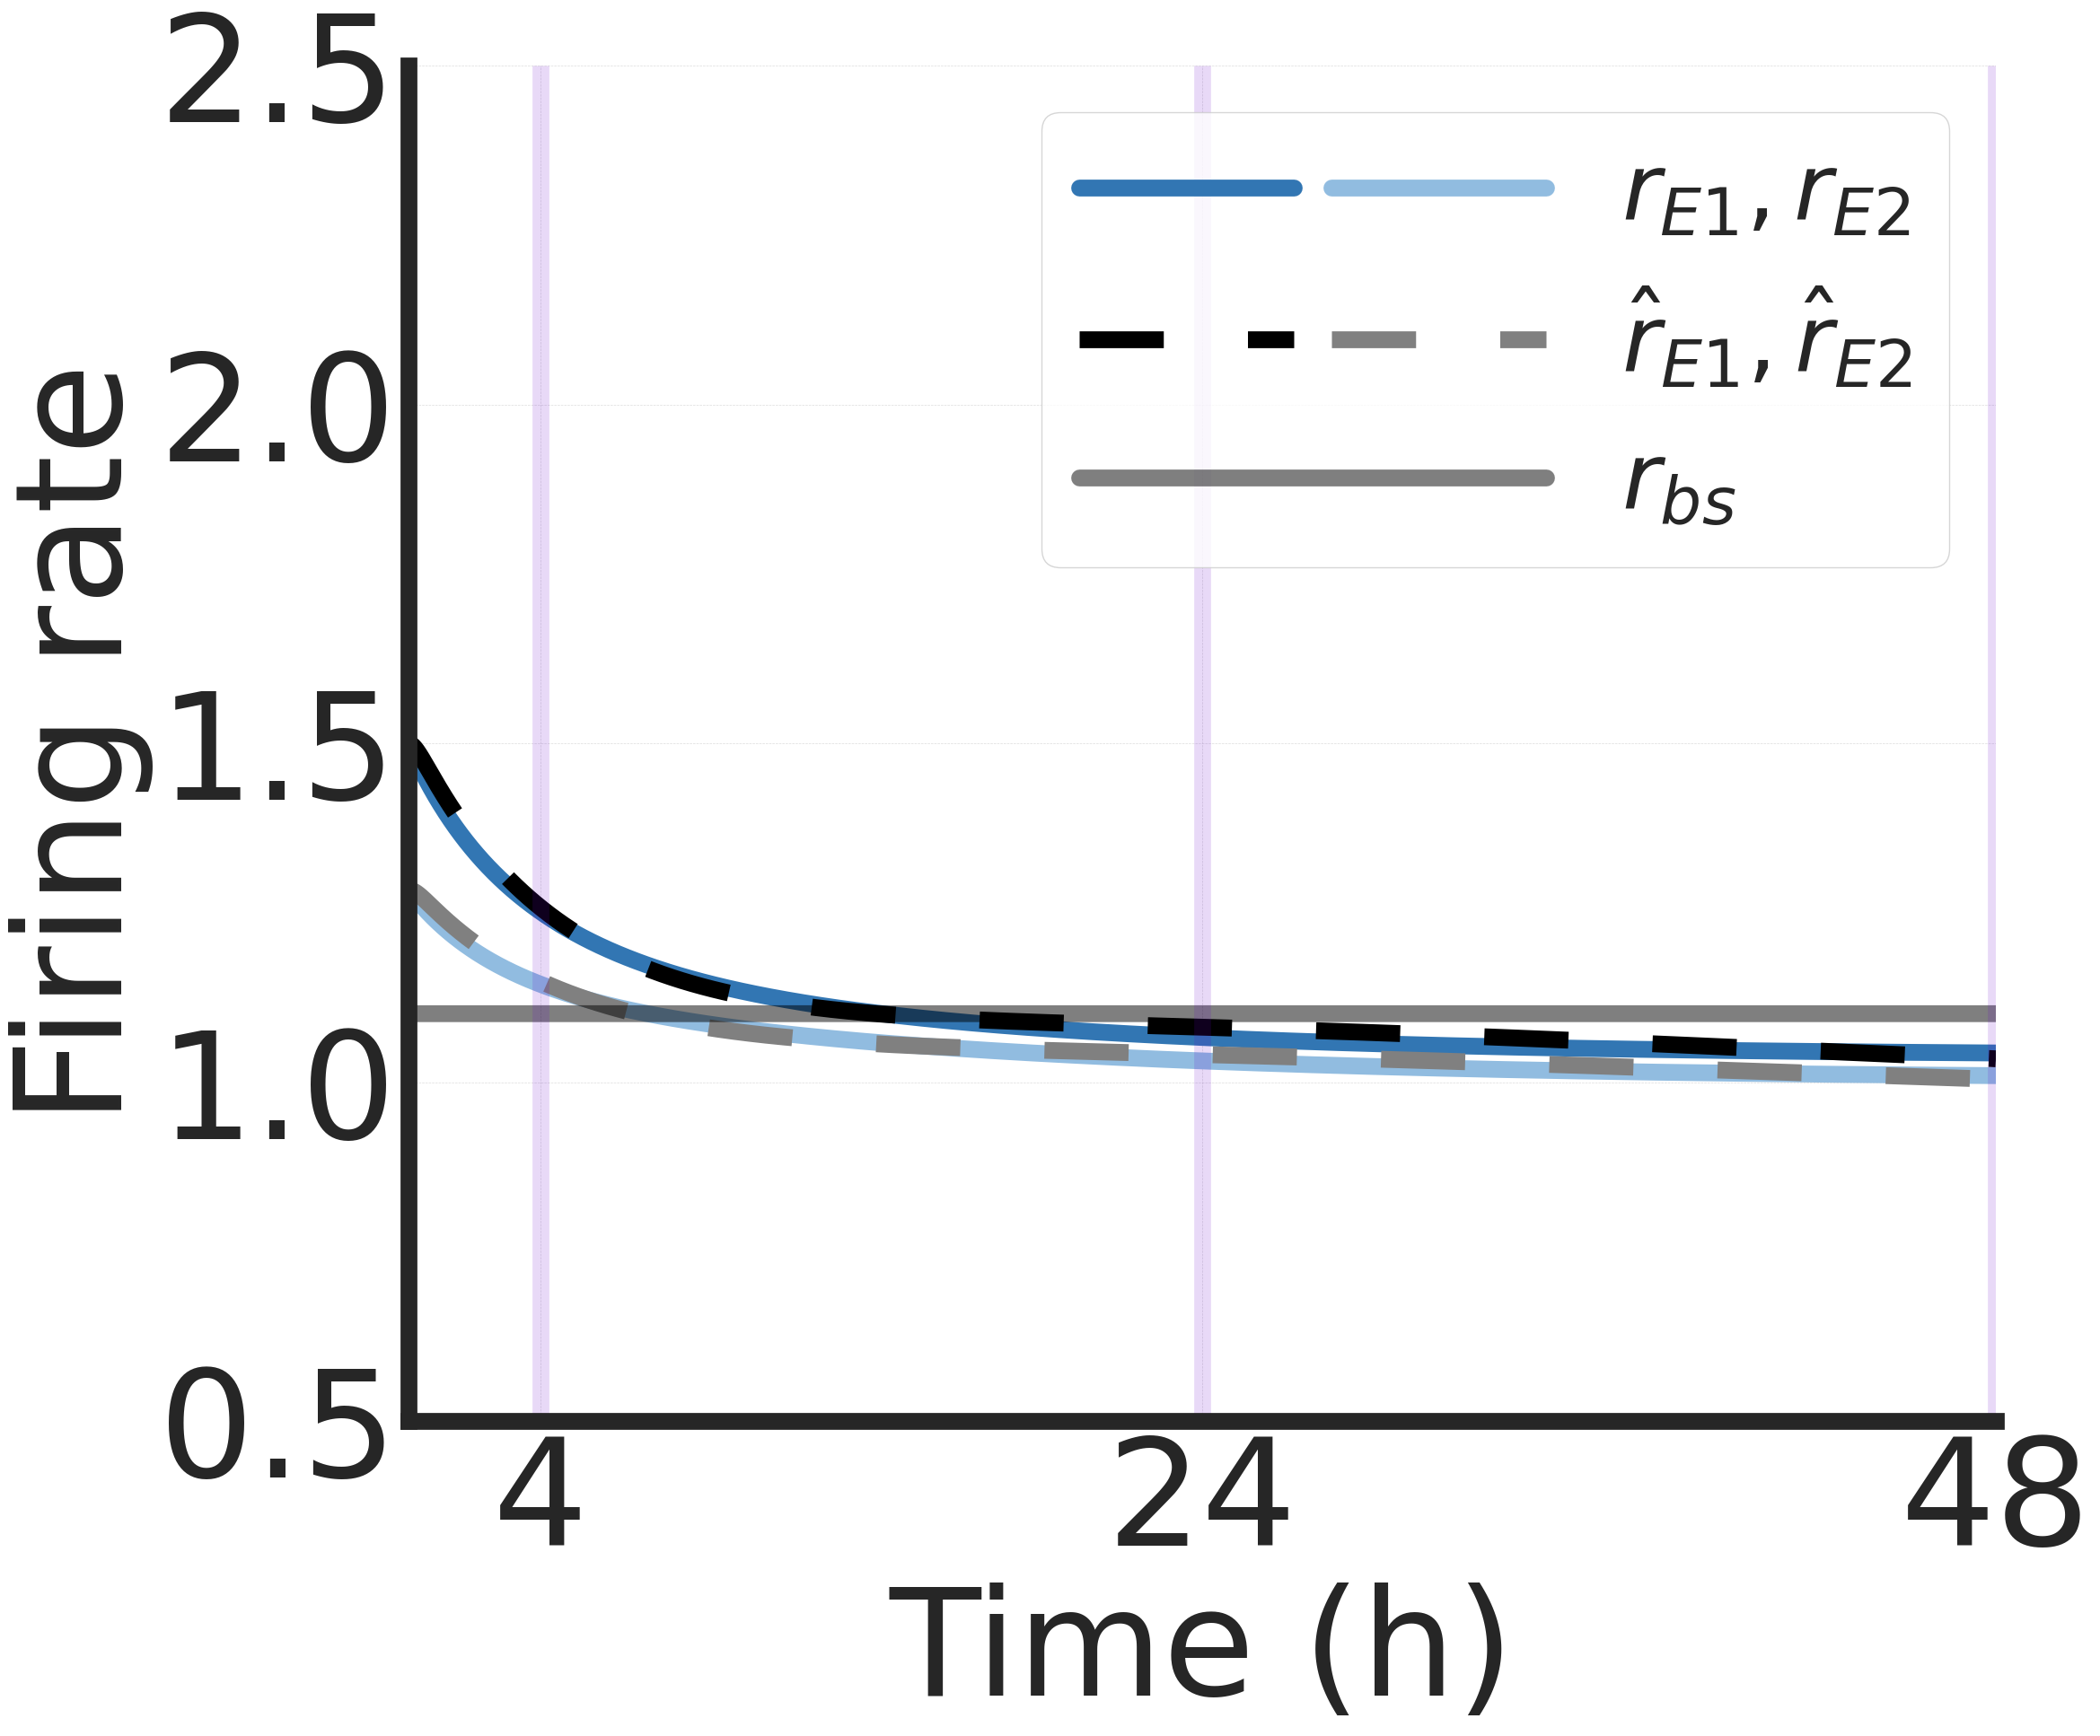

In [35]:
# #for better look
# rE_y_labels = [1, 1.25, 1.5]  # , 3.5] #[0,5,10,15]
# rE_ymin = 0.9
# rE_ymax = 1.55

# #for paper
rE_y_labels = [0.5,1, 1.5, 2,2.5]  # , 3.5] #[0,5,10,15]
rE_ymin = 0.5
rE_ymax = 2.5

# Time step and simulation parameters
dt = 0.001

tau_E, tau_P, tau_S = 0.02, 0.005, 0.01  # Time constants
rheobase_E, rheobase_P, rheobase_S = 1.5, 1.5, 1.5

g_E, g_P, g_S = 4.5, 3.2, 3.0
taus = np.array([tau_E, tau_P, tau_S, tau_E, tau_P, tau_S])
rheobases = np.array([rheobase_E, rheobase_P, rheobase_S, rheobase_E, rheobase_P, rheobase_S])
g_inputs = np.array([g_E, g_P, g_S, g_E, g_P, g_S])

# Simulation data
skip_first_time_points = 2 #before steady state
x_data = np.array(l_time_points_phase2)[skip_first_time_points:]
rE1, rE2 = np.array(r_phase2[0][skip_first_time_points:]), np.array(r_phase2[1][skip_first_time_points:])
rP1, rP2 = np.array(r_phase2[2][skip_first_time_points:]), np.array(r_phase2[3][skip_first_time_points:])
rS1, rS2 = np.array(r_phase2[4][skip_first_time_points:]), np.array(r_phase2[5][skip_first_time_points:])

# Initial firing rates and history
r = np.array([rE1[skip_first_time_points],rP1[skip_first_time_points],rS1[skip_first_time_points],rE2[skip_first_time_points],rP2[skip_first_time_points],rS2[skip_first_time_points]])
time = range(len(x_data))
r_history = np.zeros((len(time), 6))

# Simulation loop
for t_idx, t in enumerate(time):
    W_t = np.array([
        [wE1E1_match[t_idx], -wE1P1_match[t_idx], -wE1S1_match[t_idx], wE1E2_match[t_idx], -wE1P2_match[t_idx], -wE1S2_match[t_idx]],
        [w_PE_within, -w_PP_within, -w_PS_within, w_PE_cross, -w_PP_cross, -w_PS_cross],
        [w_SE_within, 0, 0, w_SE_cross, 0, 0],
        [wE2E1_match[t_idx], -wE2P1_match[t_idx], -wE2S1_match[t_idx], wE2E2_match[t_idx], -wE2P2_match[t_idx], -wE2S2_match[t_idx]],
        [w_PE_cross, -w_PP_cross, -w_PS_cross, w_PE_within, -w_PP_within, -w_PS_within],
        [w_SE_cross, 0, 0, w_SE_within, 0, 0]
    ])

    g_stim_vector = g_inputs
    dr_dt = (-r + np.maximum(W_t @ r + g_stim_vector - rheobases, 0)) / taus
    r += dt * dr_dt
    r_history[t_idx] = r

# Analytical fits
y_fit1 = r_history[:, 0]
y_fit2 = r_history[:, 3]

# Plotting
plt.figure(figsize=(figure_width, figure_len))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)

# Plot data
color_list = ['#3276b3', '#91bce0', '#C10000', '#EFABAB', '#007100', '#87CB87', '#6600cc']
e1, = ax.plot(x_data, rE1, '-', color=color_list[0], linewidth=plot_line_width, label=r'Numerics $r_{E1}$')
e2, = ax.plot(x_data, rE2, '-', color=color_list[1], linewidth=plot_line_width, label=r'Numerics $r_{E2}$')

fite1, = ax.plot(x_data, y_fit1, color='black', linewidth=plot_line_width, linestyle=(0, (5, 5)), label=r'Analytical Fit $r_{E1}$')
fite2, = ax.plot(x_data, y_fit2, color='grey', linewidth=plot_line_width, linestyle=(0, (5, 5)), label=r'Analytical Fit $r_{E2}$')

rb, = plt.plot(l_time_points_phase2, r_phase1[0][0] * np.ones_like(l_time_points_phase2), linestyle='-', color='black', alpha=0.5, linewidth=plot_line_width, label='$r_{bs}$')

# Vertical lines for reference points
plt.vlines([4, 24, 48], rE_ymin, rE_ymax, color=color_list[6], linewidth=plot_line_width, alpha=0.15)

# Format plot
plt.ylim([rE_ymin, rE_ymax])
plt.xlim([0, l_time_points_phase2[-1]])
plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
plt.yticks(rE_y_labels, fontsize=font_size_1, **hfont)
plt.xlabel('Time (h)', fontsize=font_size_label, **hfont)
plt.ylabel('Firing rate', fontsize=font_size_label, **hfont)

r_squared1 = compute_r_squared(rE1, y_fit1, label="SubNetwork 1")
r_squared2 = compute_r_squared(rE2, y_fit2, label="SubNetwork 2")

ax.legend(
    [(e1, e2), (fite1, fite2), rb],
    [rf"$r_{{E1}}, r_{{E2}}$", rf"$\hat{{r}}_{{E1}}, \hat{{r}}_{{E2}}$", "$r_{bs}$"],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    fontsize=legend_size,
    loc="upper right",
    handlelength=5
)

ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig(dir_plot_analytical + 'E_firing_rates_match' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'E_firing_rates_match' + id_p + '.png', format='png')
plt.show()


# Plotting Generalization Index

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

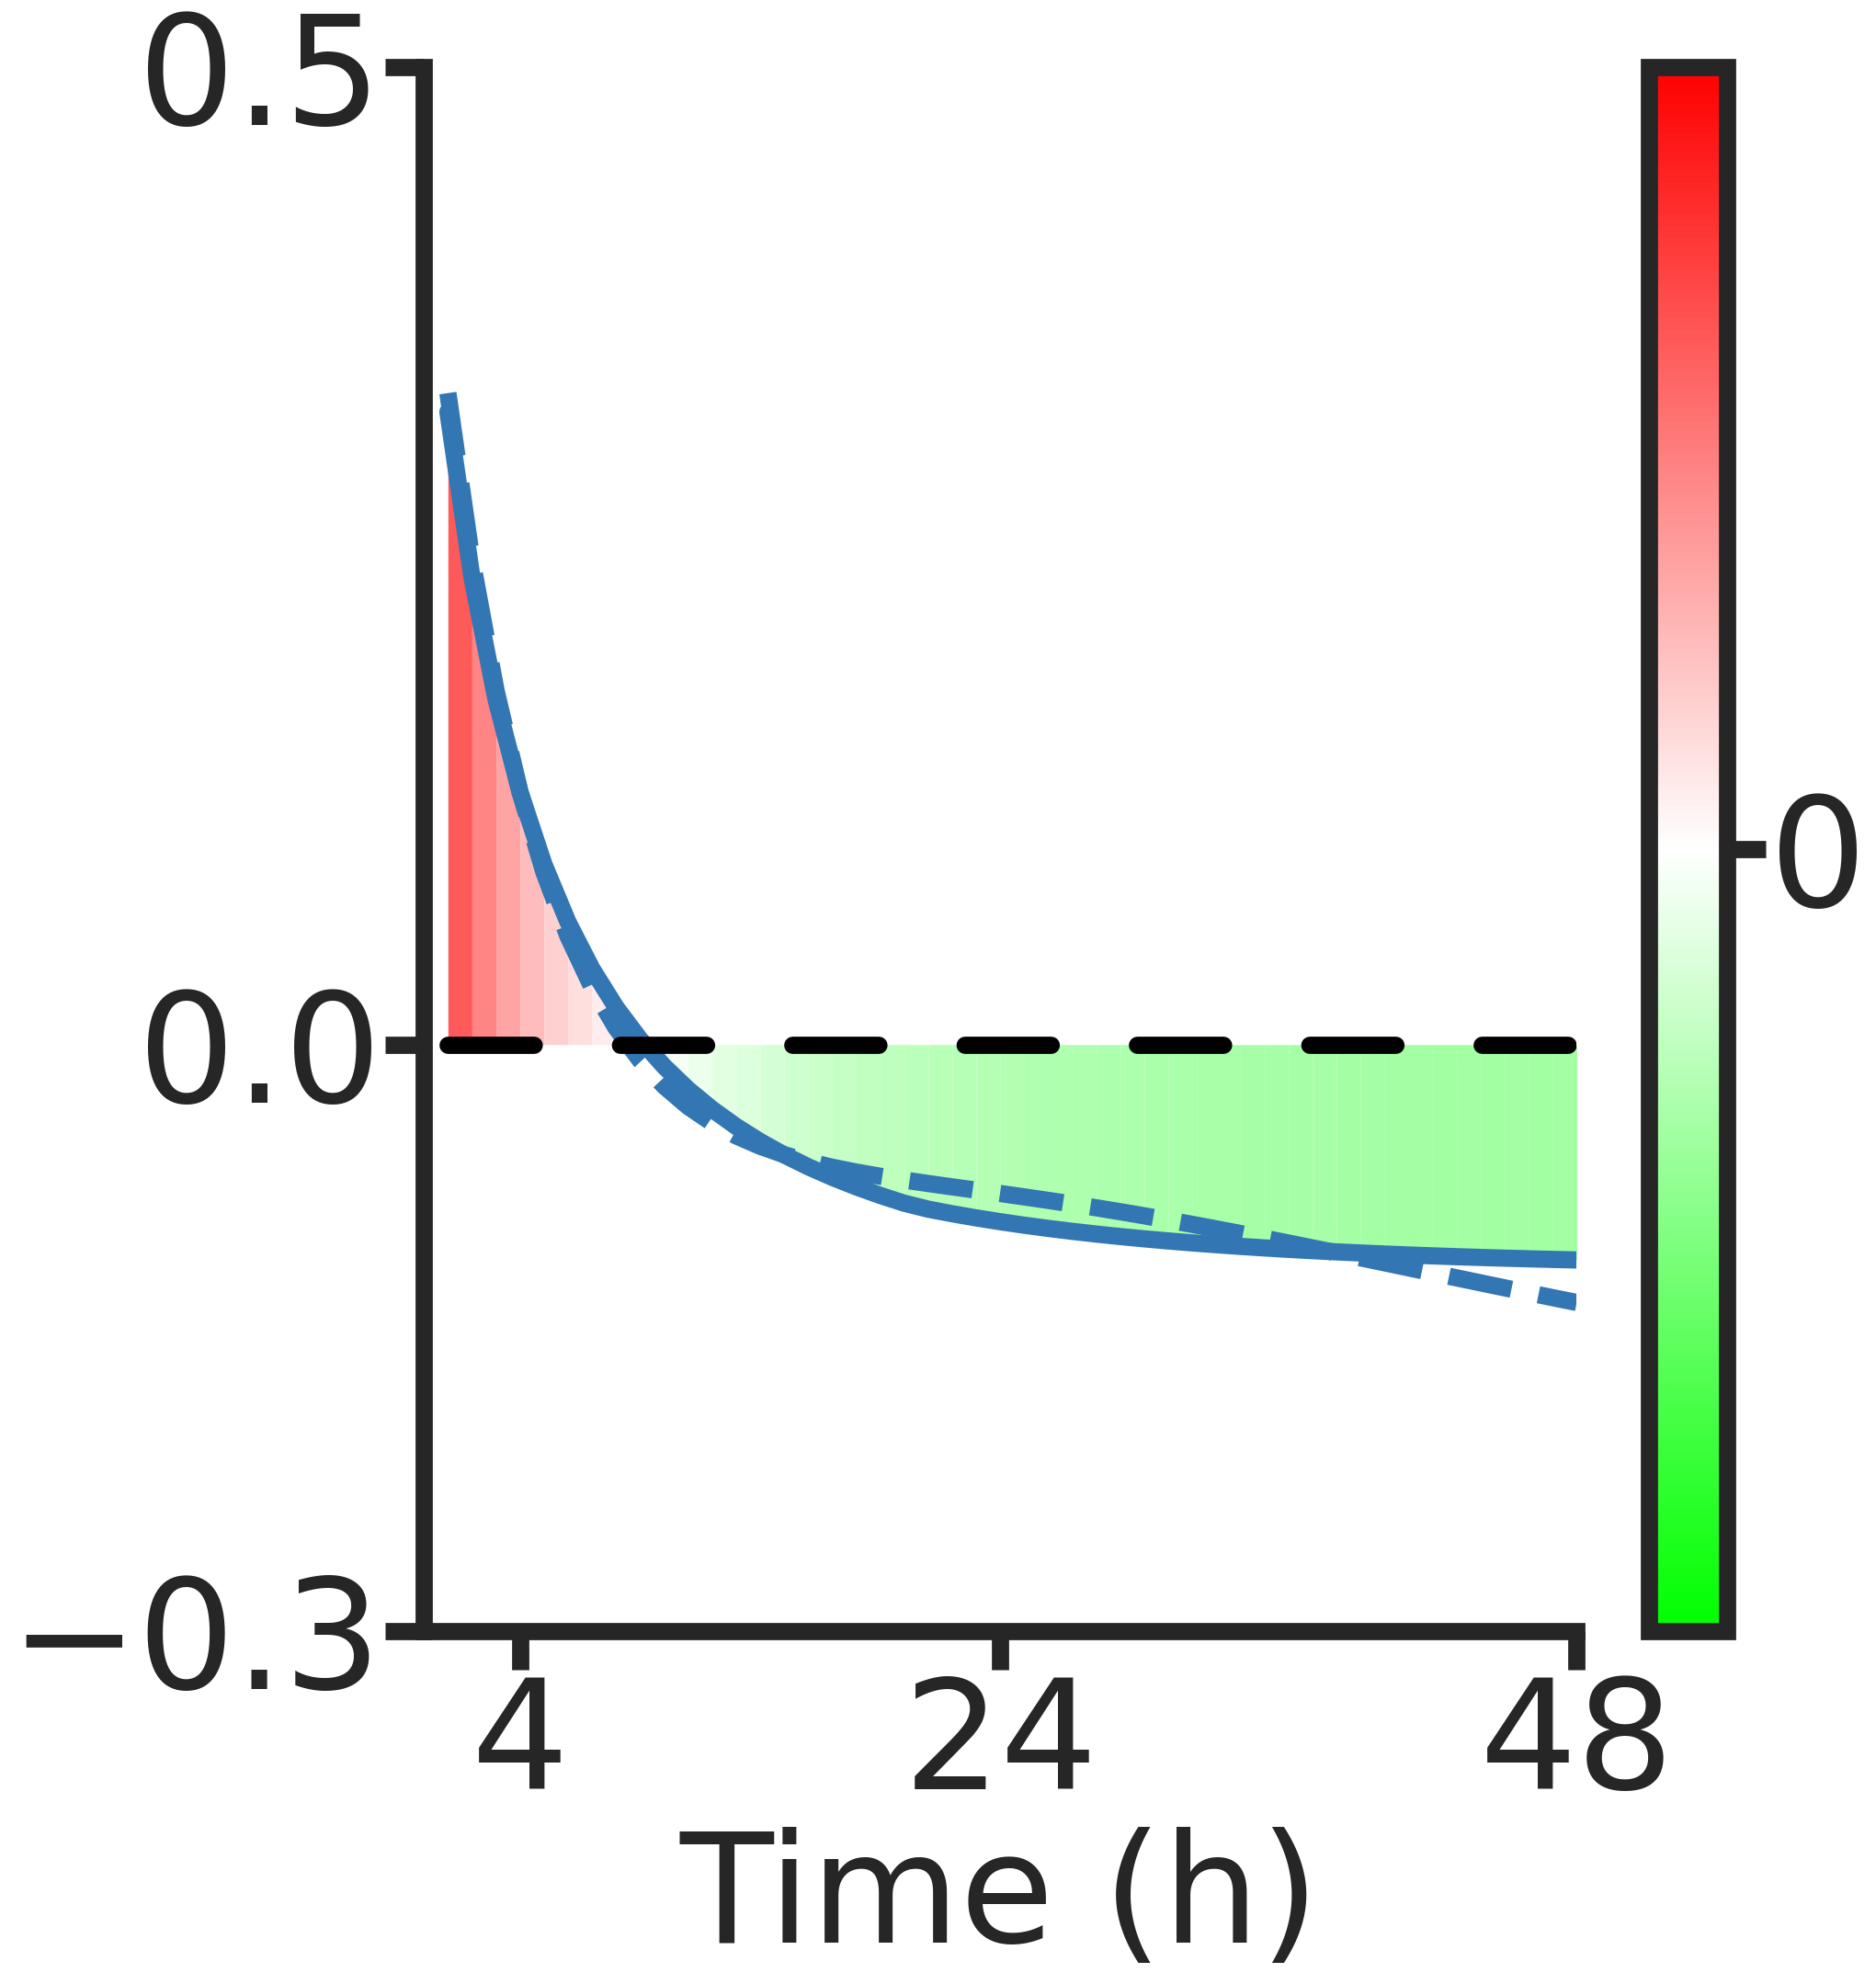

In [37]:
x_label_text = 'Time (h)'
hour_sims = np.arange(48) + 1
# plotting configuration
ratio = 1.5
figure_len2, figure_width2 = 14.5 * ratio, 13.7 * ratio
font_size_1, font_size_2 = 80 * ratio, 65 * ratio
font_size_label = 80 * ratio
legend_size = 50 * ratio
legend_size2 = 65 * ratio
line_width, tick_len = 9 * ratio, 20 * ratio
marker_size = 15 * ratio
marker_edge_width = 3 * ratio
plot_line_width = 9 * ratio
hfont = {'fontname': 'Arial'}
sns.set(style='ticks')

#adding novel stimulus
g_E, g_P, g_S = 4.5, 3.2, 3.0
g_inputs = np.array([g_E, g_P, g_S, g_E, g_P, g_S])
g_stim_E = 1
g_stim_P = 0.5
g_stim_S = 0
g_inputs += (0,0,0,g_stim_E, g_stim_P, g_stim_S)

time = range(len(x_data))
r_history_phase3 = np.zeros((len(time), 6))

for t_idx, t in enumerate(time):
    W_t = np.array([
        [wE1E1_match[t_idx], -wE1P1_match[t_idx], -wE1S1_match[t_idx], wE1E2_match[t_idx], -wE1P2_match[t_idx], -wE1S2_match[t_idx]],
        [w_PE_within, -w_PP_within, -w_PS_within, w_PE_cross, -w_PP_cross, -w_PS_cross],
        [w_SE_within, 0, 0, w_SE_cross, 0, 0],
        [wE2E1_match[t_idx], -wE2P1_match[t_idx], -wE2S1_match[t_idx], wE2E2_match[t_idx], -wE2P2_match[t_idx], -wE2S2_match[t_idx]],
        [w_PE_cross, -w_PP_cross, -w_PS_cross, w_PE_within, -w_PP_within, -w_PS_within],
        [w_SE_cross, 0, 0, w_SE_within, 0, 0]
    ])

    g_stim_vector = g_inputs
    r_touse = r_history[t_idx]
    r = np.linalg.inv(np.eye(6) - W_t) @ (g_stim_vector - rheobases)
#     dr_dt = dt * (-r_touse + np.maximum(W_t @ r_touse + g_stim_vector - rheobases, 0)) / taus
#     r = r_touse + dt * dr_dt
    r_history_phase3[t_idx] = r

# Step size for one hour
steps_per_hour = 3600 // 20  # 180 steps per hour

# Extract values from r_history_phase3 every hour
r_history_phase3_hourly = r_history_phase3[(steps_per_hour - skip_first_time_points - 1):][::steps_per_hour]
y_fit = r_history_phase3_hourly[:,0]

GI_analytics = (y_fit)

center_threshold = 0
figure_len2, figure_width2 = 14.5 * ratio, 13.7 * ratio

### % Change in reactivation of E1
xmin = 0
xmax = l_time_points_phase2[-1]

ymin = -0.3
ymax = 0.5

plt.figure(figsize=(figure_width2, figure_len2))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(line_width)
plt.tick_params(width=line_width, length=tick_len)

baseline_reactivation = av_threshold
change_in_reactivation = (np.array(l_delta_rE1) - baseline_reactivation) / baseline_reactivation
change_in_reactivation_fit = (np.array(y_fit) - baseline_reactivation) / baseline_reactivation

# Define the colors for the custom colormap
cmap_colors = [(0, 1, 0), (1, 1, 1), (1, 0, 0)]  # White, Red
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)

# Define the TwoSlopeNorm with vcenter at 15, vmin at -10, and vmax at 100
norm = mcolors.TwoSlopeNorm(vmin=ymin, vcenter=center_threshold, vmax=ymax)

# Normalize the change in reactivation
values_range = norm(change_in_reactivation)  # Normalize using TwoSlopeNorm

# Plotting and using the values to pick colors
for i in range(len(hour_sims) - 1):
    color = cmap(values_range[i])
    ax.fill_between(hour_sims[i:i + 2], center_threshold, change_in_reactivation[i:i + 2], color=color,
                    edgecolor=(0, 0, 0, 0))

plt.plot(hour_sims, change_in_reactivation, color=color_list[0], linewidth=plot_line_width, label='')
plt.plot(hour_sims, change_in_reactivation_fit, color=color_list[0], linestyle='dashed',linewidth=plot_line_width, label='')
if center_threshold != 0.0:
    plt.plot(hour_sims, center_threshold * np.ones_like(hour_sims), dash_capstyle='round',
                     linestyle=line_style_r_at, color='black', linewidth=plot_line_width, label='Aversive Threshold')
else:
    plt.plot(hour_sims, np.zeros_like(hour_sims), dash_capstyle='round',
                 linestyle=line_style_r_at, color='black', linewidth=plot_line_width, label='$r_{bs,re}$')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.tick_params(width=line_width, length=tick_len, labelsize=font_size_1)
# cbar.set_ticks([0, 15, 100], fontsize=font_size_1, **hfont)

cbar.set_ticks([center_threshold])
cbar.ax.tick_params(labelsize=font_size_1)

cbar.outline.set_linewidth(line_width)  # Set colorbar border thickness


plt.xticks(fontsize=font_size_1, **hfont)
plt.yticks(fontsize=font_size_1, **hfont)

plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])
plt.xticks([4, 24, 48], fontsize=font_size_1, **hfont)
plt.xlabel(x_label_text, fontsize=font_size_label, **hfont)

plt.yticks([ymin,center_threshold,ymax], fontsize=font_size_1, **hfont)
#         plt.yticks([-30, center_threshold, 320], fontsize=font_size_1, **hfont)
#         plt.ylabel('CIR [%]', fontsize=font_size_label, **hfont)
# plt.ylabel('Generalization Index', fontsize=font_size_label, **hfont)
# ax.legend(handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=legend_size,loc='lower center', bbox_to_anchor=(0.5, 1.05), handlelength=3)

plt.tight_layout()
plt.savefig(dir_plot_analytical + 'GI_match' + id_p + '.pdf', format='pdf')
plt.savefig(dir_plot_analytical + 'GI_match' + id_p + '.png', format='png')
plt.show()